# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# Jupyter Settings

In [2]:
pd.options.display.max_rows = 200000

# Data Read

In [3]:
df = pd.read_csv('Leads.csv')

# Data Understanding

In [4]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
df.shape

(9240, 37)

There are 9240 records and 37 columns.

In [6]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Variable Identification

In [8]:
# Checking the Converted Rate

converted = (sum(df['Converted'])/len(df['Converted'].index))*100

converted

38.53896103896104

There is almost 40% of conversion in the given data set.

## Describe Numeric

In [9]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Describe Categorical

In [10]:
cat_var = [cname for cname in df.columns if df[cname].dtype == "object"]

df[cat_var].describe()

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     612cb3c6-4878-48d6-8618-29338dd9cffa  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Country  \
count         9204         9240        9240          9137    6779   
unique          21            2           2            17      38   
top         Google           No          No  Email Opened   India   
freq          2868         8506        9238          3437    6492   

       Specialization How did you hear about X Education  \
count            7802                               7033   
unique             19                                 10   
top            Select                             Select   
freq             1942                               5043   

       What is your current occupation          ...          Lead Quality  \
count                             6550          ...                  4473   
unique                               6          ...                     5   
top                         Unemployed          ...              Might be   
freq                              5600          ...                  1560   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       Lead Profile    City Asymmetrique Activity Index  \
count          6531    7820                        5022   
unique            6       7                           3   
top          Select  Mumbai                   02.Medium   
freq           4146    3222                        3839   

       Asymmetrique Profile Index I agree to pay the amount through cheque  \
count                        5022                                     9240   
unique                          3                                        1   
top                     02.Medium                                       No   
freq                         2788                                     9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 30 columns]

## Unique value counts

In [11]:
unique_values = pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)

unique_values['dtype'] = pd.DataFrame(df.dtypes)

unique_values

Unique Value Count    dtype
Get updates on DM Content                                       1   object
I agree to pay the amount through cheque                        1   object
Receive More Updates About Our Courses                          1   object
Magazine                                                        1   object
Update me on Supply Chain Content                               1   object
Through Recommendations                                         2   object
Digital Advertisement                                           2   object
Newspaper                                                       2   object
X Education Forums                                              2   object
A free copy of Mastering The Interview                          2   object
Search                                                          2   object
Newspaper Article                                               2   object
Converted                                                       2    int64
Do Not Call                                                     2   object
Do Not Email                                                    2   object
What matters most to you in choosing a course                   4   object
Asymmetrique Activity Index                                     4   object
Asymmetrique Profile Index                                      4   object
Lead Origin                                                     5   object
Lead Quality                                                    6   object
What is your current occupation                                 7   object
Lead Profile                                                    7   object
City                                                            8   object
How did you hear about X Education                             11   object
Asymmetrique Profile Score                                     11  float64
Asymmetrique Activity Score                                    13  float64
Last Notable Activity                                          16   object
Last Activity                                                  18   object
Specialization                                                 20   object
Lead Source                                                    22   object
Tags                                                           27   object
Country                                                        39   object
TotalVisits                                                    42  float64
Page Views Per Visit                                          115  float64
Total Time Spent on Website                                  1731    int64
Lead Number                                                  9240    int64
Prospect ID                                                  9240   object

This is a very important attribute to understand the variance in each column so that we can identify which columns have all values same and all values different to be used to decide whether or not to drop the variable.

## Frequency Distribution of Unique Values of all Columns

In [12]:
cols = list(df.columns)
cols.remove('Prospect ID')
cols.remove('Lead Number')
cols.remove('Total Time Spent on Website')
cols.remove('Page Views Per Visit')

for col in cols:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Lead Origin
############################################
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

############################################
Unique value distribution of Lead Source
############################################
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
welearnblog_Home        1
blog                    1
testone                 1
Pay per Click Ads       1
NC_EDM                  

## Min Max Values of Numeric Columns

In [13]:
# Check if all the values of the variables are in the same scale

numeric_cols = [cname for cname in df.columns if 
                                df[cname].dtype in ['int64', 'float64']]

Max = pd.DataFrame(df[numeric_cols].max().rename('Max'))
Min = pd.DataFrame(df[numeric_cols].min().rename('Min'))

pd.concat([Max, Min], axis=1)

Max       Min
Lead Number                  660737.0  579533.0
Converted                         1.0       0.0
TotalVisits                     251.0       0.0
Total Time Spent on Website    2272.0       0.0
Page Views Per Visit             55.0       0.0
Asymmetrique Activity Score      18.0       7.0
Asymmetrique Profile Score       20.0      11.0

# Data Cleaning

## Dropping Columns with Single/All Different Values

In [14]:
drop_col = ['Prospect ID', 'Lead Number', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 
            'Receive More Updates About Our Courses', 'Magazine', 'Update me on Supply Chain Content']

df.drop(drop_col, axis=1, inplace=True)

## Dropping Columns with Very High Imabalance

Below columns have a very high number of a single value compared to the other hence not useful for the analysis.

In [15]:
for col in ['Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Search', 
            'Newspaper Article', 'What matters most to you in choosing a course', 'Do Not Call']:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Through Recommendations
############################################
No     9233
Yes       7
Name: Through Recommendations, dtype: int64

############################################
Unique value distribution of Digital Advertisement
############################################
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

############################################
Unique value distribution of Newspaper
############################################
No     9239
Yes       1
Name: Newspaper, dtype: int64

############################################
Unique value distribution of X Education Forums
############################################
No     9239
Yes       1
Name: X Education Forums, dtype: int64

############################################
Unique value distribution of Search
############################################
No     9226
Yes      14
Name: Search, dtype: int64

###############

In [16]:
drop_col = ['Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Search', 
            'Newspaper Article', 'What matters most to you in choosing a course', 'Do Not Call']

df.drop(drop_col, axis=1, inplace=True)

## Droping Insignificant Columns

If we observe the values of city column, all of them are from India which makes the column Country not useful for the analysis.

In [17]:
df.drop(['Country'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            7802 non-null object
How did you hear about X Education        7033 non-null object
What is your current occupation           6550 non-null object
Tags                                      5887 non-null object
Lead Quality                              4473 non-null object
Lead Profile                              6531 non-null object
City       

## Rename Columns

In [19]:
df.rename(columns=
            {
             "Lead Origin":"Lead_Origin",
             "Lead Source":"Lead_Source",
             "Do Not Email":"No_Email",
             "TotalVisits":"Total_Visits",
             "Total Time Spent on Website":"Time_On_Website",
             "Page Views Per Visit":"Page_Views",
             "Last Activity":"Last_Activity",
             "How did you hear about X Education":"Hear",
             "What is your current occupation":"Occupation",
             "Lead Quality":"Lead_Quality",
             "Lead Profile":"Lead_Profile",
             "Asymmetrique Activity Index":"Activity_Index",
             "Asymmetrique Profile Index":"Profile_Index",
             "Asymmetrique Activity Score":"Activity_Score",
             "Asymmetrique Profile Score":"Profile_Score",
             "A free copy of Mastering The Interview":"Free_Copy",
             "Last Notable Activity":"Last_Notable_Activity"
            }, 
            inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
Lead_Origin              9240 non-null object
Lead_Source              9204 non-null object
No_Email                 9240 non-null object
Converted                9240 non-null int64
Total_Visits             9103 non-null float64
Time_On_Website          9240 non-null int64
Page_Views               9103 non-null float64
Last_Activity            9137 non-null object
Specialization           7802 non-null object
Hear                     7033 non-null object
Occupation               6550 non-null object
Tags                     5887 non-null object
Lead_Quality             4473 non-null object
Lead_Profile             6531 non-null object
City                     7820 non-null object
Activity_Index           5022 non-null object
Profile_Index            5022 non-null object
Activity_Score           5022 non-null float64
Profile_Score            5022 non-null float64
Free_Copy        

In [21]:
cols = list(df.columns)
cols.remove('Time_On_Website')
cols.remove('Page_Views')
cols.remove('Total_Visits')
cols.remove('Profile_Index')
cols.remove('Activity_Score')
cols.remove('Profile_Score')
cols.remove('Converted')

for col in cols:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Lead_Origin
############################################
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead_Origin, dtype: int64

############################################
Unique value distribution of Lead_Source
############################################
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
welearnblog_Home        1
blog                    1
testone                 1
Pay per Click Ads       1
NC_EDM                  

## Standardizing Values

In [22]:
cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

for col in cat_cols:
    df[col] = df[col].str.lower()

Converting all text to lower helps in identifying duplicate values due to case.

In [23]:
cols = list(df.columns)
cols.remove('Time_On_Website')
cols.remove('Page_Views')
cols.remove('Total_Visits')
cols.remove('Profile_Index')
cols.remove('Activity_Score')
cols.remove('Profile_Score')
cols.remove('Converted')

for col in cols:
    print('\n################################')
    print('Unique values of ' + str(col))
    print('################################')
    print(pd.Series(df[col].unique()).sort_values(ascending=True))


################################
Unique values of Lead_Origin
################################
0                        api
1    landing page submission
2              lead add form
3                lead import
4             quick add form
dtype: object

################################
Unique values of Lead_Source
################################
11                 bing
9                  blog
14           click2call
2        direct traffic
7              facebook
3                google
15            live chat
20               nc_edm
0            olark chat
1        organic search
10    pay per click ads
19        press_release
6             reference
4        referral sites
12         social media
18              testone
13              welearn
16     welearnblog_home
5      welingak website
17       youtubechannel
8                   NaN
dtype: object

################################
Unique values of No_Email
################################
0     no
1    yes
dtype: object

#####

## Duplicates

In [24]:
df.duplicated().value_counts()

False    7958
True     1282
dtype: int64

There are 1282 duplicate rows in the data set. We can drop them.

In [25]:
df.loc[df.duplicated()]

Lead_Origin       Lead_Source No_Email  Converted  Total_Visits  \
16              api        olark chat       no          0           0.0   
47              api        olark chat       no          0           0.0   
49              api        olark chat       no          0           0.0   
83              api        olark chat       no          0           0.0   
190             api        olark chat       no          0           0.0   
192             api        olark chat       no          0           0.0   
198             api        olark chat       no          0           0.0   
199             api        olark chat       no          0           0.0   
236             api        olark chat       no          0           0.0   
241             api        olark chat       no          0           0.0   
248             api        olark chat       no          0           0.0   
256             api        olark chat       no          0           0.0   
263             api        olark chat       no          0           0.0   
270   lead add form         reference       no          1           0.0   
278             api        olark chat       no          0           0.0   
290             api        olark chat       no          0           0.0   
300             api        olark chat       no          0           0.0   
323             api        olark chat       no          0           0.0   
332             api        olark chat       no          0           0.0   
351             api        olark chat       no          0           0.0   
366             api        olark chat       no          0           0.0   
368             api        olark chat       no          0           0.0   
380             api        olark chat       no          0           0.0   
383             api        olark chat       no          0           0.0   
395             api        olark chat       no          0           0.0   
460   lead add form  welingak website       no          1           0.0   
476             api        olark chat       no          0           0.0   
478             api        olark chat       no          0           0.0   
480             api        olark chat       no          0           0.0   
507   lead add form  welingak website       no          1           0.0   
514             api        olark chat       no          0           0.0   
518             api        olark chat       no          0           0.0   
527             api        olark chat       no          0           0.0   
552             api        olark chat       no          0           0.0   
557             api        olark chat       no          0           0.0   
645             api        olark chat       no          0           0.0   
660             api        olark chat       no          0           0.0   
742             api        olark chat       no          0           0.0   
762             api        olark chat       no          0           0.0   
774             api        olark chat      yes          0           0.0   
793             api        olark chat       no          0           0.0   
817             api        olark chat       no          0           0.0   
820             api        olark chat       no          0           0.0   
830             api        olark chat       no          0           0.0   
852             api        olark chat       no          0           0.0   
909             api        olark chat       no          0           0.0   
920             api        olark chat       no          0           0.0   
929             api        olark chat       no          0           0.0   
932             api        olark chat       no          0           0.0   
992             api        olark chat       no          0           0.0   
1028            api        olark chat       no          0           0.0   
1029            api        olark chat       no          0           0.0   
1042            api        olark 

In [26]:
df.drop_duplicates(keep='first', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Data columns (total 21 columns):
Lead_Origin              7958 non-null object
Lead_Source              7925 non-null object
No_Email                 7958 non-null object
Converted                7958 non-null int64
Total_Visits             7821 non-null float64
Time_On_Website          7958 non-null int64
Page_Views               7821 non-null float64
Last_Activity            7855 non-null object
Specialization           7259 non-null object
Hear                     6490 non-null object
Occupation               6007 non-null object
Tags                     5556 non-null object
Lead_Quality             4253 non-null object
Lead_Profile             5988 non-null object
City                     7276 non-null object
Activity_Index           4444 non-null object
Profile_Index            4444 non-null object
Activity_Score           4444 non-null float64
Profile_Score            4444 non-null float64
Free_Copy        

## Missing Values

In [28]:
null_series = pd.Series(round(100*(df.isnull().sum(axis=0)/len(df.index)), 2).sort_values(ascending = False))
null_series.loc[null_series.values > 0]

Lead_Quality      46.56
Profile_Score     44.16
Activity_Score    44.16
Profile_Index     44.16
Activity_Index    44.16
Tags              30.18
Lead_Profile      24.75
Occupation        24.52
Hear              18.45
Specialization     8.78
City               8.57
Page_Views         1.72
Total_Visits       1.72
Last_Activity      1.29
Lead_Source        0.41
dtype: float64

Dropping columns whose missing value % is >= **30%** as they won't help in the analysis and imputing them would only add more bias.

In [29]:
drop_col = ['Lead_Quality','Profile_Score','Activity_Score','Profile_Index','Activity_Index','Tags']

df.drop(drop_col, axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Data columns (total 15 columns):
Lead_Origin              7958 non-null object
Lead_Source              7925 non-null object
No_Email                 7958 non-null object
Converted                7958 non-null int64
Total_Visits             7821 non-null float64
Time_On_Website          7958 non-null int64
Page_Views               7821 non-null float64
Last_Activity            7855 non-null object
Specialization           7259 non-null object
Hear                     6490 non-null object
Occupation               6007 non-null object
Lead_Profile             5988 non-null object
City                     7276 non-null object
Free_Copy                7958 non-null object
Last_Notable_Activity    7958 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 994.8+ KB


In [31]:
null_series = pd.Series(round(100*(df.isnull().sum(axis=0)/len(df.index)), 2).sort_values(ascending = False))
null_series.loc[null_series.values > 0]

Lead_Profile      24.75
Occupation        24.52
Hear              18.45
Specialization     8.78
City               8.57
Page_Views         1.72
Total_Visits       1.72
Last_Activity      1.29
Lead_Source        0.41
dtype: float64

Finding the different unique values of the missing value columns to see how we can impute them.

In [32]:
for col in ['Lead_Profile','Occupation','Hear','Specialization','City','Page_Views','Total_Visits',
            'Last_Activity','Lead_Source']:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Lead_Profile
############################################
select                         3751
NaN                            1970
potential lead                 1508
other leads                     484
student of someschool           201
lateral student                  24
dual specialization student      20
Name: Lead_Profile, dtype: int64

############################################
Unique value distribution of Occupation
############################################
unemployed              5150
NaN                     1951
working professional     638
student                  185
other                     16
housewife                 10
businessman                8
Name: Occupation, dtype: int64

############################################
Unique value distribution of Hear
############################################
select                   4500
NaN                      1468
online search             808
wo

A general strategy is employed here to impute nulls, which is to impute them with the 'select' value which is equivalen to null. At a later statge, dummy variables are created and the select dummy variable will be dropped.

This will take care of nulls and as well as preserves the information.

Same is the case with other columns where the nulls are imputed with 'unspecified' and that dummy variable is dropped later.

In [33]:
# Check the above for the strategy

df['Specialization'].fillna(value='select', inplace=True)
df['Hear'].fillna(value='select', inplace=True)
df['Lead_Profile'].fillna(value='select', inplace=True)
df['City'].fillna(value='select', inplace=True)

# Imputing

df['Occupation'].fillna(value='unspecified', inplace=True)
df['Last_Activity'].fillna(value='unspecified', inplace=True)
df['Lead_Source'].fillna(value='unspecified', inplace=True)

# Imputing with the mode value

df['Total_Visits'].fillna(value=2.0, inplace=True)
df['Page_Views'].fillna(value=2.0, inplace=True)

In [34]:
df.isnull().values.any()

False

In [35]:
for col in ['Lead_Profile','Occupation','Hear','Specialization','City','Page_Views','Total_Visits',
            'Last_Activity','Lead_Source']:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Lead_Profile
############################################
select                         5721
potential lead                 1508
other leads                     484
student of someschool           201
lateral student                  24
dual specialization student      20
Name: Lead_Profile, dtype: int64

############################################
Unique value distribution of Occupation
############################################
unemployed              5150
unspecified             1951
working professional     638
student                  185
other                     16
housewife                 10
businessman                8
Name: Occupation, dtype: int64

############################################
Unique value distribution of Hear
############################################
select                   5968
online search             808
word of mouth             348
student of someschool     310
other   

# EDA

## Univariate Analysis

In [36]:
from tabulate import tabulate

def univariate_categorical(df):
        
   cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]        

   for col in cat_cols:
    
       len_cat = len(df[col].unique())
    
       print('\n############' + col + '############')
       print('\nNumber of unique values => ' + str(len_cat) + '\n\n')

       if len_cat > 10:
           plt.figure(figsize=(15, 12))
            
       else:
           plt.figure(figsize=(10, 8))
        
       y = "count"
       plt.subplot(1, 2, 1)
       sns.countplot(df[col])
       count_df = df[col].value_counts().rename(y).reset_index().rename(columns={"index":col})

       y = "percent(%)"
       percent_df = df[col].value_counts(normalize=True).apply(lambda x: round(x*100, 2)).rename(y).reset_index().rename(columns={"index":col})
       plt.subplot(1, 2, 2)
       sns.barplot(percent_df[col], percent_df[y], data=percent_df)

       plt.show()
       print(tabulate(pd.merge(percent_df, count_df, how='inner'), headers='keys', tablefmt='fancy_grid'))


############Lead_Origin############

Number of unique values => 5




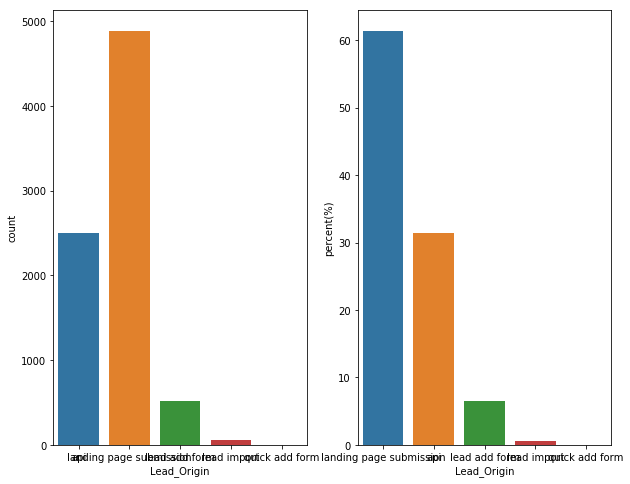

╒════╤═════════════════════════╤══════════════╤═════════╕
│    │ Lead_Origin             │   percent(%) │   count │
╞════╪═════════════════════════╪══════════════╪═════════╡
│  0 │ landing page submission │        61.4  │    4886 │
├────┼─────────────────────────┼──────────────┼─────────┤
│  1 │ api                     │        31.39 │    2498 │
├────┼─────────────────────────┼──────────────┼─────────┤
│  2 │ lead add form           │         6.55 │     521 │
├────┼─────────────────────────┼──────────────┼─────────┤
│  3 │ lead import             │         0.65 │      52 │
├────┼─────────────────────────┼──────────────┼─────────┤
│  4 │ quick add form          │         0.01 │       1 │
╘════╧═════════════════════════╧══════════════╧═════════╛

############Lead_Source############

Number of unique values => 21




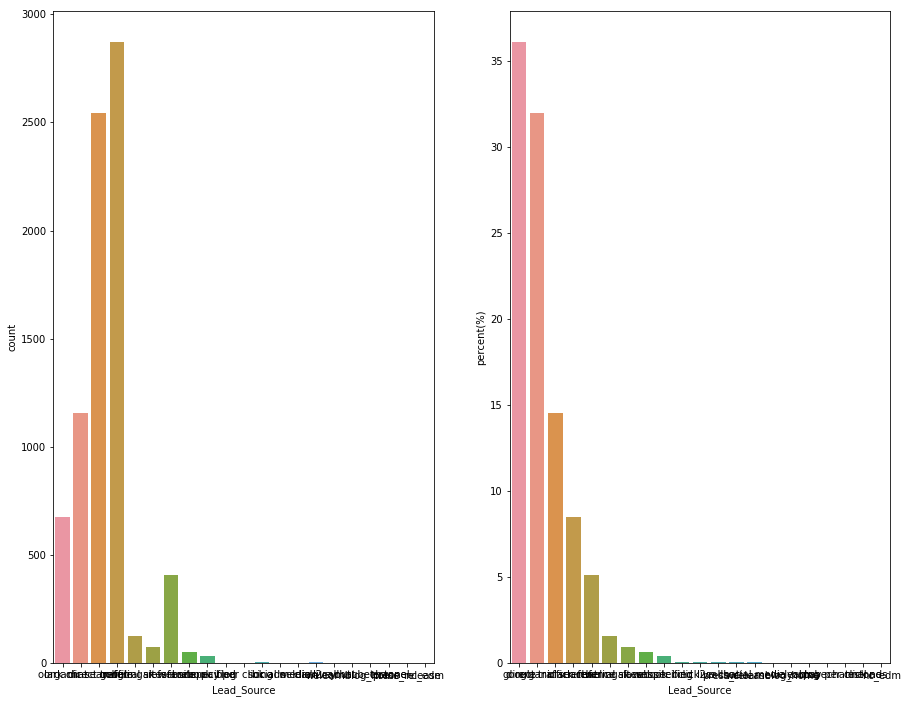

╒════╤═══════════════════╤══════════════╤═════════╕
│    │ Lead_Source       │   percent(%) │   count │
╞════╪═══════════════════╪══════════════╪═════════╡
│  0 │ google            │        36.1  │    2873 │
├────┼───────────────────┼──────────────┼─────────┤
│  1 │ direct traffic    │        31.96 │    2543 │
├────┼───────────────────┼──────────────┼─────────┤
│  2 │ organic search    │        14.5  │    1154 │
├────┼───────────────────┼──────────────┼─────────┤
│  3 │ olark chat        │         8.46 │     673 │
├────┼───────────────────┼──────────────┼─────────┤
│  4 │ reference         │         5.14 │     409 │
├────┼───────────────────┼──────────────┼─────────┤
│  5 │ referral sites    │         1.57 │     125 │
├────┼───────────────────┼──────────────┼─────────┤
│  6 │ welingak website  │         0.92 │      73 │
├────┼───────────────────┼──────────────┼─────────┤
│  7 │ facebook          │         0.65 │      52 │
├────┼───────────────────┼──────────────┼─────────┤
│  8 │ unspe

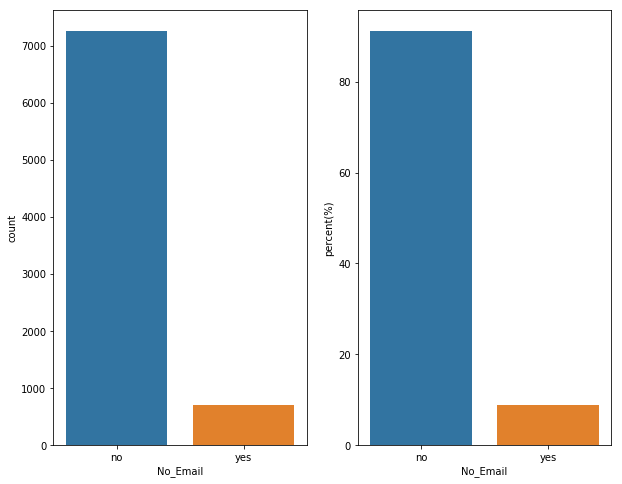

╒════╤════════════╤══════════════╤═════════╕
│    │ No_Email   │   percent(%) │   count │
╞════╪════════════╪══════════════╪═════════╡
│  0 │ no         │        91.25 │    7262 │
├────┼────────────┼──────────────┼─────────┤
│  1 │ yes        │         8.75 │     696 │
╘════╧════════════╧══════════════╧═════════╛

############Last_Activity############

Number of unique values => 18




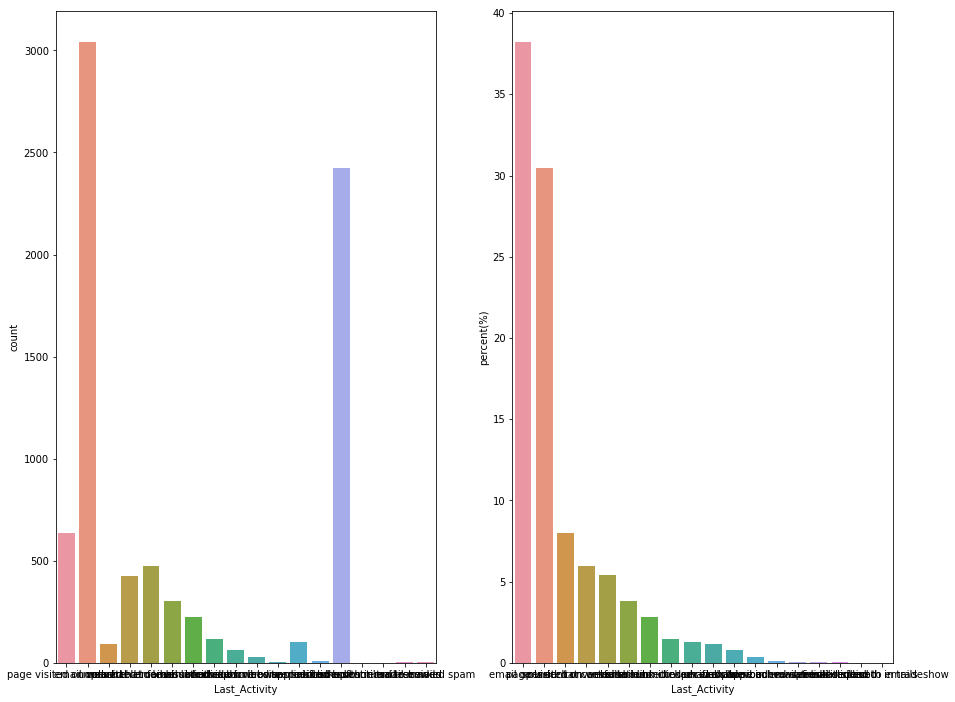

╒════╤══════════════════════════════╤══════════════╤═════════╕
│    │ Last_Activity                │   percent(%) │   count │
╞════╪══════════════════════════════╪══════════════╪═════════╡
│  0 │ email opened                 │        38.24 │    3043 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  1 │ sms sent                     │        30.49 │    2426 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  2 │ page visited on website      │         7.98 │     635 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  3 │ olark chat conversation      │         5.96 │     474 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  4 │ converted to lead            │         5.38 │     428 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  5 │ email bounced                │         3.81 │     303 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  6 │ email link clicked           │         2.83 │   

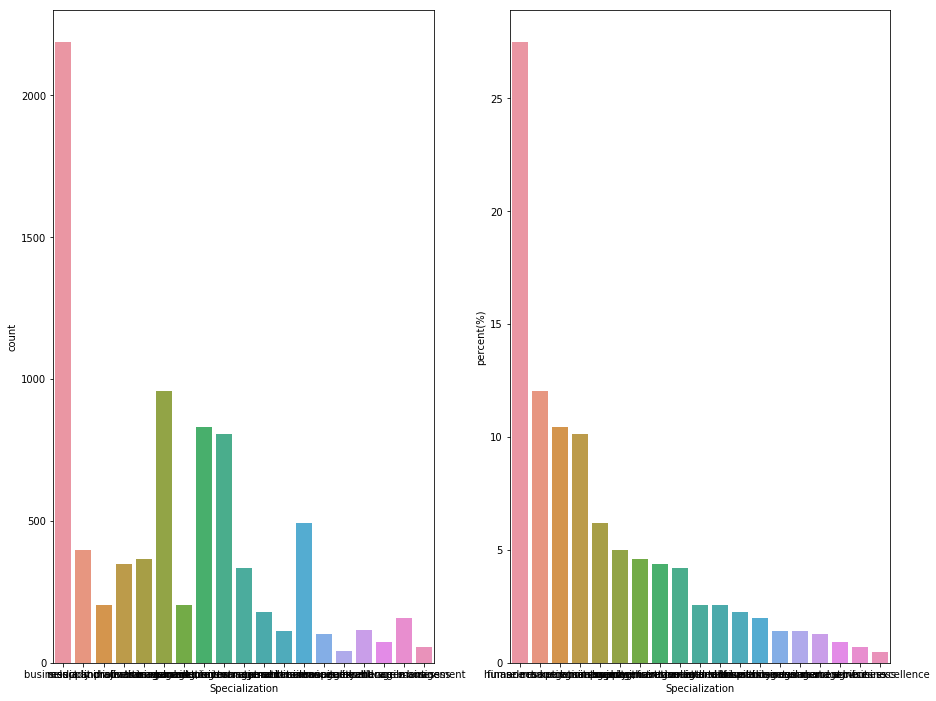

╒════╤═══════════════════════════════════╤══════════════╤═════════╕
│    │ Specialization                    │   percent(%) │   count │
╞════╪═══════════════════════════════════╪══════════════╪═════════╡
│  0 │ select                            │        27.52 │    2190 │
├────┼───────────────────────────────────┼──────────────┼─────────┤
│  1 │ finance management                │        12.03 │     957 │
├────┼───────────────────────────────────┼──────────────┼─────────┤
│  2 │ human resource management         │        10.44 │     831 │
├────┼───────────────────────────────────┼──────────────┼─────────┤
│  3 │ marketing management              │        10.12 │     805 │
├────┼───────────────────────────────────┼──────────────┼─────────┤
│  4 │ operations management             │         6.18 │     492 │
├────┼───────────────────────────────────┼──────────────┼─────────┤
│  5 │ business administration           │         4.99 │     397 │
├────┼───────────────────────────────────┼──────

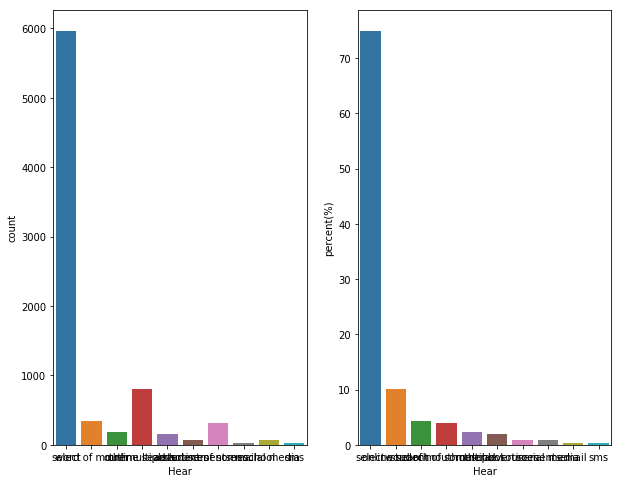

╒════╤═══════════════════════╤══════════════╤═════════╕
│    │ Hear                  │   percent(%) │   count │
╞════╪═══════════════════════╪══════════════╪═════════╡
│  0 │ select                │        74.99 │    5968 │
├────┼───────────────────────┼──────────────┼─────────┤
│  1 │ online search         │        10.15 │     808 │
├────┼───────────────────────┼──────────────┼─────────┤
│  2 │ word of mouth         │         4.37 │     348 │
├────┼───────────────────────┼──────────────┼─────────┤
│  3 │ student of someschool │         3.9  │     310 │
├────┼───────────────────────┼──────────────┼─────────┤
│  4 │ other                 │         2.34 │     186 │
├────┼───────────────────────┼──────────────┼─────────┤
│  5 │ multiple sources      │         1.91 │     152 │
├────┼───────────────────────┼──────────────┼─────────┤
│  6 │ advertisements        │         0.88 │      70 │
├────┼───────────────────────┼──────────────┼─────────┤
│  7 │ social media          │         0.84 │   

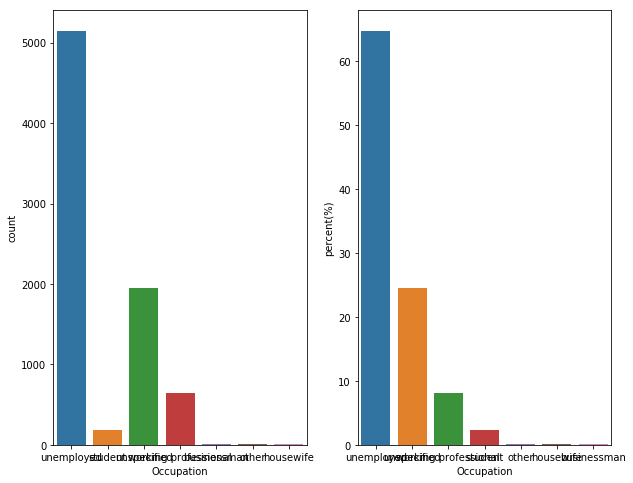

╒════╤══════════════════════╤══════════════╤═════════╕
│    │ Occupation           │   percent(%) │   count │
╞════╪══════════════════════╪══════════════╪═════════╡
│  0 │ unemployed           │        64.71 │    5150 │
├────┼──────────────────────┼──────────────┼─────────┤
│  1 │ unspecified          │        24.52 │    1951 │
├────┼──────────────────────┼──────────────┼─────────┤
│  2 │ working professional │         8.02 │     638 │
├────┼──────────────────────┼──────────────┼─────────┤
│  3 │ student              │         2.32 │     185 │
├────┼──────────────────────┼──────────────┼─────────┤
│  4 │ other                │         0.2  │      16 │
├────┼──────────────────────┼──────────────┼─────────┤
│  5 │ housewife            │         0.13 │      10 │
├────┼──────────────────────┼──────────────┼─────────┤
│  6 │ businessman          │         0.1  │       8 │
╘════╧══════════════════════╧══════════════╧═════════╛

############Lead_Profile############

Number of unique values =>

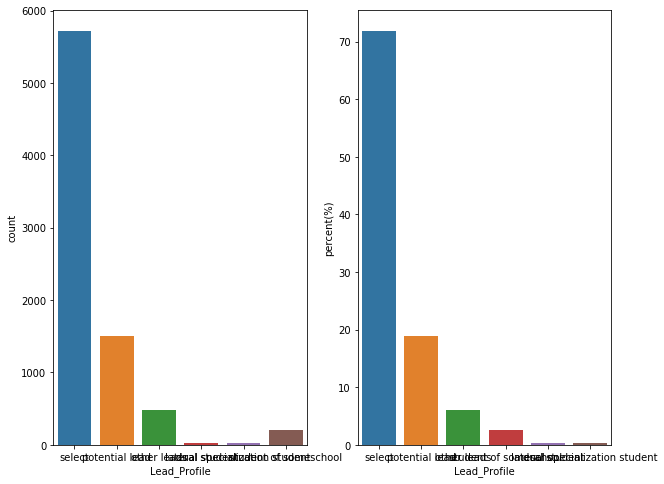

╒════╤═════════════════════════════╤══════════════╤═════════╕
│    │ Lead_Profile                │   percent(%) │   count │
╞════╪═════════════════════════════╪══════════════╪═════════╡
│  0 │ select                      │        71.89 │    5721 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  1 │ potential lead              │        18.95 │    1508 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  2 │ other leads                 │         6.08 │     484 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  3 │ student of someschool       │         2.53 │     201 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  4 │ lateral student             │         0.3  │      24 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  5 │ dual specialization student │         0.25 │      20 │
╘════╧═════════════════════════════╧══════════════╧═════════╛

############City############

Number of unique values => 7




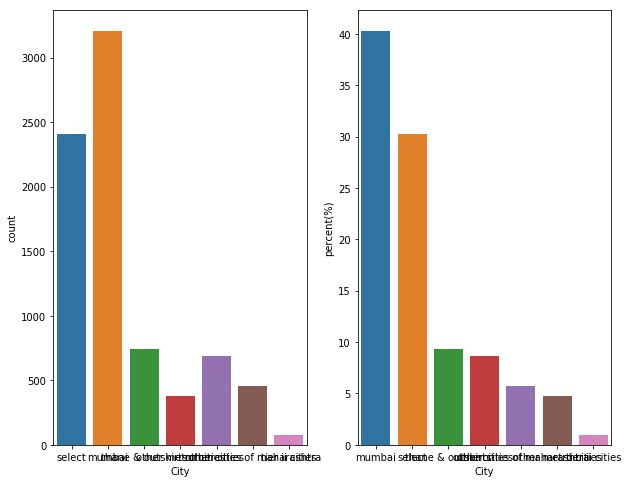

╒════╤═════════════════════════════╤══════════════╤═════════╕
│    │ City                        │   percent(%) │   count │
╞════╪═════════════════════════════╪══════════════╪═════════╡
│  0 │ mumbai                      │        40.32 │    3209 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  1 │ select                      │        30.28 │    2410 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  2 │ thane & outskirts           │         9.36 │     745 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  3 │ other cities                │         8.61 │     685 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  4 │ other cities of maharashtra │         5.72 │     455 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  5 │ other metro cities          │         4.78 │     380 │
├────┼─────────────────────────────┼──────────────┼─────────┤
│  6 │ tier ii cities              │         0.93 │      74 │
╘════╧══

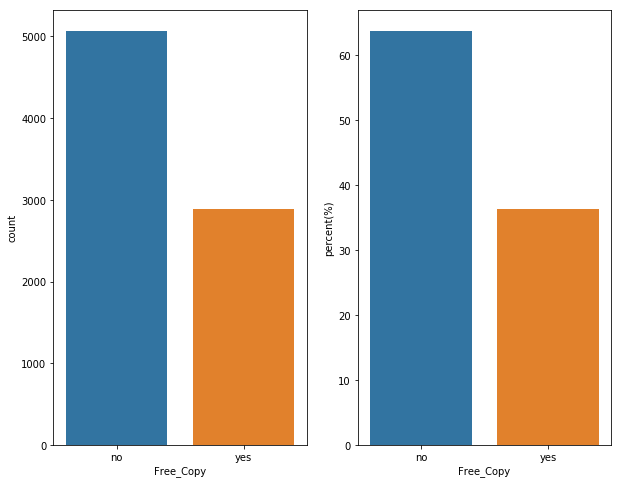

╒════╤═════════════╤══════════════╤═════════╕
│    │ Free_Copy   │   percent(%) │   count │
╞════╪═════════════╪══════════════╪═════════╡
│  0 │ no          │        63.71 │    5070 │
├────┼─────────────┼──────────────┼─────────┤
│  1 │ yes         │        36.29 │    2888 │
╘════╧═════════════╧══════════════╧═════════╛

############Last_Notable_Activity############

Number of unique values => 16




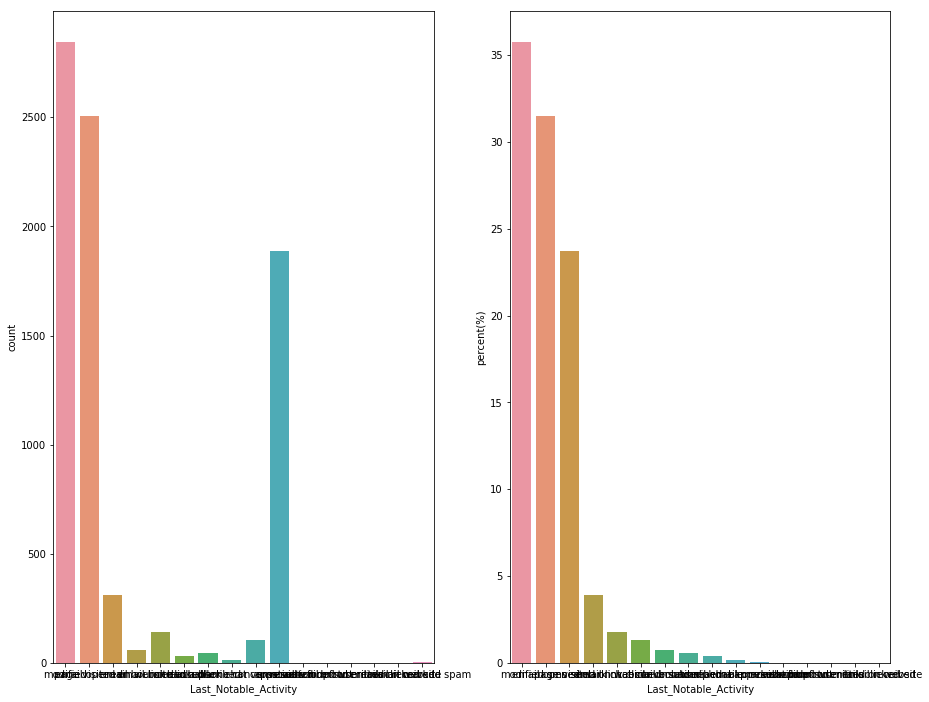

╒════╤══════════════════════════════╤══════════════╤═════════╕
│    │ Last_Notable_Activity        │   percent(%) │   count │
╞════╪══════════════════════════════╪══════════════╪═════════╡
│  0 │ modified                     │        35.78 │    2847 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  1 │ email opened                 │        31.49 │    2506 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  2 │ sms sent                     │        23.7  │    1886 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  3 │ page visited on website      │         3.93 │     313 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  4 │ email link clicked           │         1.78 │     142 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  5 │ olark chat conversation      │         1.32 │     105 │
├────┼──────────────────────────────┼──────────────┼─────────┤
│  6 │ email bounced                │         0.74 │   

In [37]:
univariate_categorical(df)

# Feature Encoding

In [38]:
for col in df:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Lead_Origin
############################################
landing page submission    4886
api                        2498
lead add form               521
lead import                  52
quick add form                1
Name: Lead_Origin, dtype: int64

############################################
Unique value distribution of Lead_Source
############################################
google               2873
direct traffic       2543
organic search       1154
olark chat            673
reference             409
referral sites        125
welingak website       73
facebook               52
unspecified            33
bing                    6
click2call              4
live chat               2
press_release           2
social media            2
testone                 1
welearnblog_home        1
welearn                 1
blog                    1
youtubechannel          1
pay per click ads       1
nc_edm                  

Since 'No_Email' and 'Free_Copy' columns have only two values, we employ binary encoding using map function.

In [39]:
# List of variables to map
varlist =  ['No_Email', 'Free_Copy']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [40]:
for col in ['No_Email', 'Free_Copy']:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of No_Email
############################################
0    7262
1     696
Name: No_Email, dtype: int64

############################################
Unique value distribution of Free_Copy
############################################
0    5070
1    2888
Name: Free_Copy, dtype: int64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Data columns (total 15 columns):
Lead_Origin              7958 non-null object
Lead_Source              7958 non-null object
No_Email                 7958 non-null int64
Converted                7958 non-null int64
Total_Visits             7958 non-null float64
Time_On_Website          7958 non-null int64
Page_Views               7958 non-null float64
Last_Activity            7958 non-null object
Specialization           7958 non-null object
Hear                     7958 non-null object
Occupation               7958 non-null object
Lead_Profile             7958 non-null object
City                     7958 non-null object
Free_Copy                7958 non-null int64
Last_Notable_Activity    7958 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 1.3+ MB


Going with plain old dummy variable creation for 'Lead_Origin', 'Last_Notable_Activity' columns.

In [42]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead_Origin', 'Last_Notable_Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [43]:
# We have created dummies for the below variables, so we can drop them

df = df.drop(['Lead_Origin', 'Last_Notable_Activity'], 1)

In [44]:
# Creating dummy variables for the remaining categorical variables and dropping the level which was created to impute nulls

############################################################################################################

# Creating dummy variables for the variable 'Specialization'
specialization = pd.get_dummies(df['Specialization'], prefix='Specialization')

# Dropping Specialization_select column
specialization = specialization.drop(['Specialization_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, specialization], axis=1)

# Dropping the redundant column
df = df.drop(['Specialization'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Hear'
hear = pd.get_dummies(df['Hear'], prefix='Hear')

# Dropping Hear_select column
hear = hear.drop(['Hear_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, hear], axis=1)

# Dropping the redundant column
df = df.drop(['Hear'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Lead_Profile'
lead_profile = pd.get_dummies(df['Lead_Profile'], prefix='Lead_Profile')

# Dropping Lead_Profile_select column
lead_profile = lead_profile.drop(['Lead_Profile_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, lead_profile], axis=1)

# Dropping the redundant column
df = df.drop(['Lead_Profile'], 1)

############################################################################################################

# Creating dummy variables for the variable 'City'
city = pd.get_dummies(df['City'], prefix='City')

# Dropping City_select column
city = city.drop(['City_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, city], axis=1)

# Dropping the redundant column
df = df.drop(['City'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Occupation'
occupation = pd.get_dummies(df['Occupation'], prefix='Occupation')

# Dropping Occupation_unspecified column
occupation = occupation.drop(['Occupation_unspecified'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, occupation], axis=1)

# Dropping the redundant column
df = df.drop(['Occupation'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Last_Activity'
last_activity = pd.get_dummies(df['Last_Activity'], prefix='Last_Activity')

# Dropping Last_Activity_unspecified column
last_activity = last_activity.drop(['Last_Activity_unspecified'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, last_activity], axis=1)

# Dropping the redundant column
df = df.drop(['Last_Activity'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Lead_Source'
lead_source = pd.get_dummies(df['Lead_Source'], prefix='Lead_Source')

# Dropping Lead_Source_unspecified column
lead_source = lead_source.drop(['Lead_Source_unspecified'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, lead_source], axis=1)

# Dropping the redundant column
df = df.drop(['Lead_Source'], 1)

In [45]:
len(df.columns)

106

We finally are left with 106 columns to deal with for our analysis.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Columns: 106 entries, No_Email to Lead_Source_youtubechannel
dtypes: float64(2), int64(4), uint8(100)
memory usage: 1.5 MB


In [47]:
list(df.columns)

['No_Email',
 'Converted',
 'Total_Visits',
 'Time_On_Website',
 'Page_Views',
 'Free_Copy',
 'Lead_Origin_landing page submission',
 'Lead_Origin_lead add form',
 'Lead_Origin_lead import',
 'Lead_Origin_quick add form',
 'Last_Notable_Activity_email bounced',
 'Last_Notable_Activity_email link clicked',
 'Last_Notable_Activity_email marked spam',
 'Last_Notable_Activity_email opened',
 'Last_Notable_Activity_email received',
 'Last_Notable_Activity_form submitted on website',
 'Last_Notable_Activity_had a phone conversation',
 'Last_Notable_Activity_modified',
 'Last_Notable_Activity_olark chat conversation',
 'Last_Notable_Activity_page visited on website',
 'Last_Notable_Activity_resubscribed to emails',
 'Last_Notable_Activity_sms sent',
 'Last_Notable_Activity_unreachable',
 'Last_Notable_Activity_unsubscribed',
 'Last_Notable_Activity_view in browser link clicked',
 'Specialization_banking, investment and insurance',
 'Specialization_business administration',
 'Specialization_e-

# Outliers

In [48]:
def univariate_continuos(df):
    
    numeric_cols = ['Total_Visits','Time_On_Website','Page_Views']
    
    for col in numeric_cols:
    
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

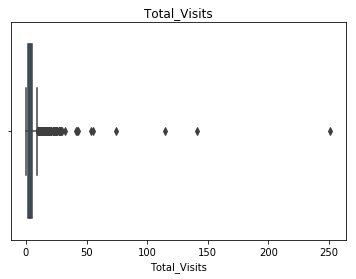

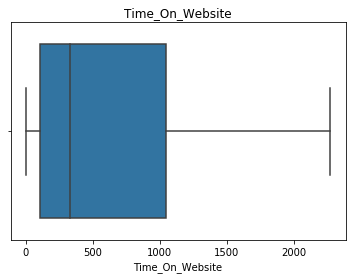

In [49]:
univariate_continuos(df)

Columns 'Total_Visits' and 'Page_Views' have outliers in their data and will be dealt with the common capping method where we assign the 'Q3+1.5*IQR' value to the values greater than that.

In [50]:
col = 'Total_Visits'

print('\nFrequency distribution of unique values => \n\n'+ str(df[col].value_counts(dropna=False).sort_index(ascending = False)))


Frequency distribution of unique values => 

251.0       1
141.0       1
115.0       1
74.0        1
55.0        1
54.0        1
43.0        1
42.0        1
41.0        1
32.0        1
30.0        1
29.0        2
28.0        2
27.0        5
26.0        2
25.0        5
24.0        5
23.0        6
22.0        3
21.0        6
20.0       12
19.0        9
18.0       15
17.0       16
16.0       21
15.0       18
14.0       36
13.0       48
12.0       45
11.0       86
10.0      114
9.0       164
8.0       224
7.0       309
6.0       466
5.0       783
4.0      1120
3.0      1306
2.0      1817
1.0       395
0.0       907
Name: Total_Visits, dtype: int64


In [51]:
col = 'Page_Views'

print('\nFrequency distribution of unique values => \n\n'+ str(df[col].value_counts(dropna=False).sort_index(ascending = False)))


Frequency distribution of unique values => 

55.00       1
24.00       1
16.00       3
15.00       4
14.50       1
14.00       9
13.00       6
12.33       1
12.00       5
11.50       1
11.00      18
10.00      25
9.00       45
8.50        1
8.33        1
8.21        1
8.00       86
7.50        2
7.00      133
6.71        1
6.67        1
6.50       13
6.33        1
6.00      244
5.67        3
5.50       21
5.40        2
5.33        2
5.25        2
5.00      517
4.75        3
4.50       43
4.40        1
4.33        9
4.25        3
4.17        1
4.00      896
3.91        1
3.83        1
3.82        1
3.80        1
3.75        2
3.67       16
3.60        2
3.57        1
3.50       94
3.43        1
3.40        4
3.38        1
3.33       27
3.29        1
3.25        8
3.20        2
3.17        1
3.00     1196
2.90        1
2.86        1
2.83        2
2.80        9
2.75       12
2.71        2
2.67       54
2.63        1
2.60        4
2.57        1
2.56        1
2.50      241
2.45        1
2.

In [52]:
def outlier_treatment(df, col):

    print('#########################')
    print(col)
    print('#########################')
    
    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_high = Q3+1.5*IQR
    print('Fence High is => ' + str(fence_high))
    
    print('Imputing values greater than ' + str(fence_high) + ' with the same value')

    df.loc[(df[col] > fence_high), col] = fence_high
    
    print('\n')
    
    return df

In [53]:
df = outlier_treatment(df, 'Total_Visits')
df = outlier_treatment(df, 'Page_Views')

#########################
Total_Visits
#########################
Q1 is => 2.0
Q3 is => 5.0
Fence High is => 9.5
Imputing values greater than 9.5 with the same value


#########################
Page_Views
#########################
Q1 is => 1.545
Q3 is => 4.0
Fence High is => 7.6825
Imputing values greater than 7.6825 with the same value




In [54]:
df.loc[df['Total_Visits'] == 9.5, 'Total_Visits'] = 10.0

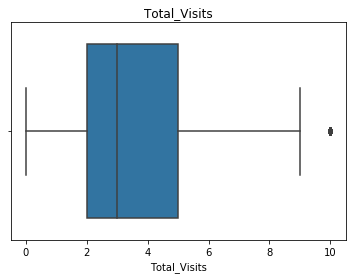

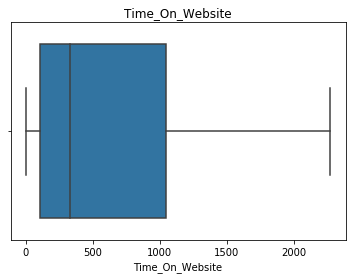

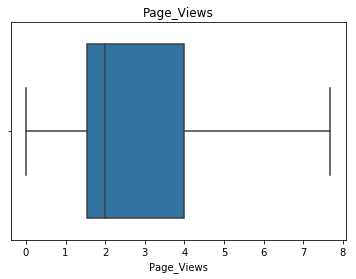

In [55]:
univariate_continuos(df)

Now, the outliers are treated.

In [56]:
col = 'Total_Visits'

print('\nFrequency distribution of unique values => \n\n'+ str(df[col].value_counts(dropna=False).sort_index(ascending = False)))


Frequency distribution of unique values => 

10.0     467
9.0      164
8.0      224
7.0      309
6.0      466
5.0      783
4.0     1120
3.0     1306
2.0     1817
1.0      395
0.0      907
Name: Total_Visits, dtype: int64


In [57]:
col = 'Page_Views'

print('\nFrequency distribution of unique values => \n\n'+ str(df[col].value_counts(dropna=False).sort_index(ascending = False)))


Frequency distribution of unique values => 

7.6825     209
7.5000       2
7.0000     133
6.7100       1
6.6700       1
6.5000      13
6.3300       1
6.0000     244
5.6700       3
5.5000      21
5.4000       2
5.3300       2
5.2500       2
5.0000     517
4.7500       3
4.5000      43
4.4000       1
4.3300       9
4.2500       3
4.1700       1
4.0000     896
3.9100       1
3.8300       1
3.8200       1
3.8000       1
3.7500       2
3.6700      16
3.6000       2
3.5700       1
3.5000      94
3.4300       1
3.4000       4
3.3800       1
3.3300      27
3.2900       1
3.2500       8
3.2000       2
3.1700       1
3.0000    1196
2.9000       1
2.8600       1
2.8300       2
2.8000       9
2.7500      12
2.7100       2
2.6700      54
2.6300       1
2.6000       4
2.5700       1
2.5600       1
2.5000     241
2.4500       1
2.4000       6
2.3800       1
2.3300      59
2.2900       1
2.2500      19
2.2200       2
2.2000       9
2.1700       8
2.1400       1
2.1300       1
2.0900       2
2.0800   

**We will now build 3 models with taking RFE o/p as 15, 10 and 20 each and will evaluate them based on various metrics.**

# Model 1 (RFE 15)

## Test-Train Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)

X.head()

No_Email  Total_Visits  Time_On_Website  Page_Views  Free_Copy  \
0         0           0.0                0         0.0          0   
1         0           5.0              674         2.5          0   
2         0           2.0             1532         2.0          1   
3         0           1.0              305         1.0          0   
4         0           2.0             1428         1.0          0   

   Lead_Origin_landing page submission  Lead_Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_lead import  Lead_Origin_quick add form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Last_Notable_Activity_email bounced             ...              \
0                                    0             ...               
1                                    0             ...               
2                                    0             ...               
3                                    0             ...               
4                                    0             ...               

   Lead_Source_pay per click ads  Lead_Source_press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead_Source_reference  Lead_Source_referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead_Source_social media  Lead_Source_testone  Lead_Source_welearn  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   Lead_Source_welearnblog_home  Lead_Source_welingak website  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Lead_Source_youtubechannel  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 105 columns]

In [60]:
# Putting response variable to y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Columns: 106 entries, No_Email to Lead_Source_youtubechannel
dtypes: float64(2), int64(4), uint8(100)
memory usage: 1.5 MB


In [63]:
from sklearn.preprocessing import StandardScaler

Using standard scaler for the non dummy variables.

In [64]:
scaler = StandardScaler()

X_train[['Total_Visits','Time_On_Website','Page_Views']] = scaler.fit_transform(X_train[['Total_Visits','Time_On_Website','Page_Views']])

X_train.head()

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

No_Email  Total_Visits  Time_On_Website  Page_Views  Free_Copy  \
5032         0      2.405676         1.395384    2.812711          1   
5316         1      0.512754        -0.890202    1.309611          0   
4405         0     -1.380168        -1.031803   -1.492065          0   
2089         0     -0.622999         1.139413   -0.371395          0   
1370         0     -1.380168        -1.031803   -1.492065          0   

      Lead_Origin_landing page submission  Lead_Origin_lead add form  \
5032                                    1                          0   
5316                                    1                          0   
4405                                    0                          0   
2089                                    0                          0   
1370                                    0                          0   

      Lead_Origin_lead import  Lead_Origin_quick add form  \
5032                        0                           0   
5316                        0                           0   
4405                        0                           0   
2089                        0                           0   
1370                        0                           0   

      Last_Notable_Activity_email bounced             ...              \
5032                                    0             ...               
5316                                    0             ...               
4405                                    0             ...               
2089                                    0             ...               
1370                                    0             ...               

      Lead_Source_pay per click ads  Lead_Source_press_release  \
5032                              0                          0   
5316                              0                          0   
4405                              0                          0   
2089                              0                          0   
1370                              0                          0   

      Lead_Source_reference  Lead_Source_referral sites  \
5032                      0                           0   
5316                      0                           0   
4405                      0                           0   
2089                      0                           0   
1370                      0                           0   

      Lead_Source_social media  Lead_Source_testone  Lead_Source_welearn  \
5032                         0                    0                    0   
5316                         0                    0                    0   
4405                         0                    0                    0   
2089                         0                    0                    0   
1370                         0                    0                    0   

      Lead_Source_welearnblog_home  Lead_Source_welingak website  \
5032                             0                             0   
5316                             0                             0   
4405                             0                             0   
2089                             0                             0   
1370                             0                             0   

      Lead_Source_youtubechannel  
5032                           0  
5316                           0  
4405                           0  
2089                           0  
1370                           0  

[5 rows x 105 columns]

In [65]:
X_train[['Total_Visits','Time_On_Website','Page_Views']].describe()

Total_Visits  Time_On_Website    Page_Views
count  5.570000e+03     5.570000e+03  5.570000e+03
mean  -7.201899e-16     4.267482e-17  1.873626e-17
std    1.000090e+00     1.000090e+00  1.000090e+00
min   -1.380168e+00    -1.031803e+00 -1.492065e+00
25%   -6.229990e-01    -8.393706e-01 -5.955289e-01
50%   -2.444146e-01    -4.218291e-01 -3.713947e-01
75%    5.127541e-01     8.671035e-01  7.492760e-01
max    2.405676e+00     3.092781e+00  2.812711e+00

## Multi Collinearity

In [66]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

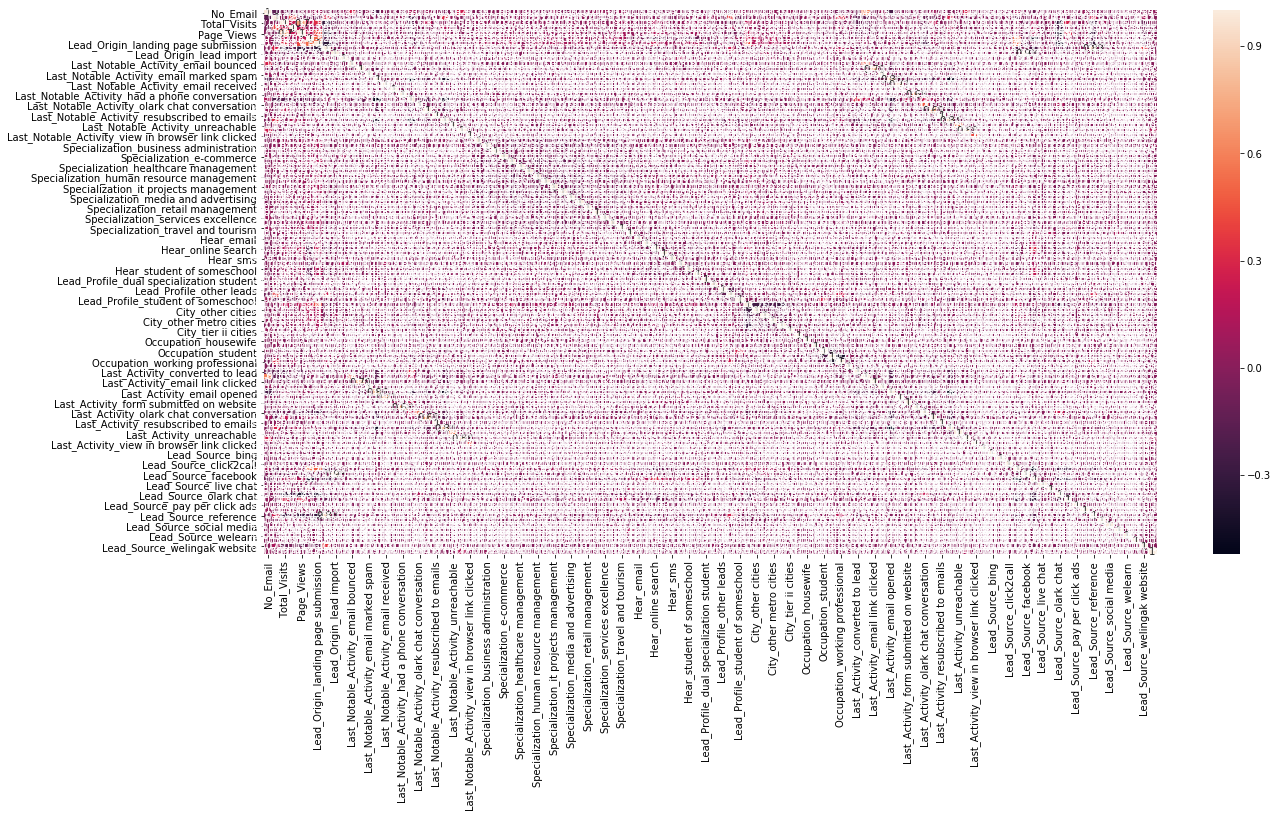

In [67]:
# Let's see the correlation matrix 

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

Since it is not clear with the heat map, we will let RFE deal with dropping the variables with high collinearity and subsequently using manual elimination based on VIF and p-values.

## Feature Selection Using RFE

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15) # Running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [70]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False], dtype=bool)

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('No_Email', True, 1),
 ('Total_Visits', False, 34),
 ('Time_On_Website', True, 1),
 ('Page_Views', False, 35),
 ('Free_Copy', False, 83),
 ('Lead_Origin_landing page submission', False, 39),
 ('Lead_Origin_lead add form', True, 1),
 ('Lead_Origin_lead import', False, 42),
 ('Lead_Origin_quick add form', False, 33),
 ('Last_Notable_Activity_email bounced', False, 64),
 ('Last_Notable_Activity_email link clicked', False, 24),
 ('Last_Notable_Activity_email marked spam', False, 63),
 ('Last_Notable_Activity_email opened', False, 9),
 ('Last_Notable_Activity_email received', False, 89),
 ('Last_Notable_Activity_form submitted on website', False, 76),
 ('Last_Notable_Activity_had a phone conversation', True, 1),
 ('Last_Notable_Activity_modified', False, 2),
 ('Last_Notable_Activity_olark chat conversation', False, 8),
 ('Last_Notable_Activity_page visited on website', False, 30),
 ('Last_Notable_Activity_resubscribed to emails', False, 14),
 ('Last_Notable_Activity_sms sent', False, 65),

In [72]:
col = X_train.columns[rfe.support_]

col

Index(['No_Email', 'Time_On_Website', 'Lead_Origin_lead add form',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_unreachable',
       'Lead_Profile_dual specialization student',
       'Lead_Profile_lateral student', 'Lead_Profile_potential lead',
       'Lead_Profile_student of someschool', 'Occupation_housewife',
       'Occupation_other', 'Occupation_working professional',
       'Last_Activity_approached upfront', 'Last_Activity_sms sent',
       'Lead_Source_welingak website'],
      dtype='object')

In [73]:
X_train.columns[~rfe.support_]

Index(['Total_Visits', 'Page_Views', 'Free_Copy',
       'Lead_Origin_landing page submission', 'Lead_Origin_lead import',
       'Lead_Origin_quick add form', 'Last_Notable_Activity_email bounced',
       'Last_Notable_Activity_email link clicked',
       'Last_Notable_Activity_email marked spam',
       'Last_Notable_Activity_email opened',
       'Last_Notable_Activity_email received',
       'Last_Notable_Activity_form submitted on website',
       'Last_Notable_Activity_modified',
       'Last_Notable_Activity_olark chat conversation',
       'Last_Notable_Activity_page visited on website',
       'Last_Notable_Activity_resubscribed to emails',
       'Last_Notable_Activity_sms sent', 'Last_Notable_Activity_unsubscribed',
       'Last_Notable_Activity_view in browser link clicked',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance manag

## Model Building

In [74]:
import statsmodels.api as sm
from sklearn import metrics

# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [75]:
def model_accuracy(res, X_train_sm, y_train):
    # Getting the predicted values on the train set

    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['CustID'] = y_train.index

    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

    from sklearn import metrics

    # Confusion matrix 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    print(confusion)

    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5554
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2365.3
Date:                Sat, 02 Mar 2019   Deviance:                       4730.7
Time:                        16:49:32   Pearson chi2:                 6.67e+03
No. Iterations:                    22                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5475      0.053    -28.960      0.000      -1.652      -1.443
No_Email                                          -1.1636      0.160     -7.292      0.000      -1.476      -0.851
Time_On_Website                                    0.9439      0.038     25.130      0.000       0.870       1.018
Lead_Origin_lead add form                          2.8865      0.214     13.492      0.000       2.467       3.306
Last_Notable_Activity_had a phone conversation     2.7355      1.195      2.288      0.022       0.392       5.078
Last_Notable_Activity_unreachable                  1.9641      0.600      3.276      0.001       0.789       3.139
Lead_Profile_dual specialization student          23.9139   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Lead_Profile_lateral student                       3.0328      1.091      2.781      0.005       0.895       5.170
Lead_Profile_potential lead                        1.8870      0.098     19.183      0.000       1.694       2.080
Lead_Profile_student of someschool                -1.7286      0.434     -3.983      0.000      -2.579      -0.878
Occupation_housewife                              23.8898   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
Occupation_other                                   1.7092      0.714      2.394      0.017       0.310       3.108
Occupation_working professional                    2.4077      0.190     12.662      0.000       2.035       2.780
Last_Activity_approached upfront                  24.6926   3.51e+04      0.001      0.999   -6.88e+04    6.88e+04
Last_Activity_sms sent                             1.3317      0.077     17.302      0.000       1.181       1.483
Lead_Source_welingak website                       2.7821      1.042      2.670      0.008       0.740       4.824
==================================================================================================================
"""

In [77]:
model_accuracy(res, X_train_sm, y_train)

[[2988  387]
 [ 685 1510]]
0.807540394973


In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        Lead_Origin_lead add form  1.37
7                      Lead_Profile_potential lead  1.28
14                    Lead_Source_welingak website  1.18
11                 Occupation_working professional  1.17
13                          Last_Activity_sms sent  1.15
1                                  Time_On_Website  1.06
0                                         No_Email  1.04
3   Last_Notable_Activity_had a phone conversation  1.01
6                     Lead_Profile_lateral student  1.01
8               Lead_Profile_student of someschool  1.01
9                             Occupation_housewife  1.01
4                Last_Notable_Activity_unreachable  1.00
5         Lead_Profile_dual specialization student  1.00
10                                Occupation_other  1.00
12                Last_Activity_approached upfront  1.00

VIF values of all the variables are significant. However we have some variables with p values > 0.05.

We will drop 'Occupation_housewife' variable since it has high p value of 0.999 and higher VIF compared to other variables with similar p value.

In [79]:
col = col.drop('Occupation_housewife', 1)
col

Index(['No_Email', 'Time_On_Website', 'Lead_Origin_lead add form',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_unreachable',
       'Lead_Profile_dual specialization student',
       'Lead_Profile_lateral student', 'Lead_Profile_potential lead',
       'Lead_Profile_student of someschool', 'Occupation_other',
       'Occupation_working professional', 'Last_Activity_approached upfront',
       'Last_Activity_sms sent', 'Lead_Source_welingak website'],
      dtype='object')

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5555
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2371.0
Date:                Sat, 02 Mar 2019   Deviance:                       4742.0
Time:                        16:49:32   Pearson chi2:                 6.72e+03
No. Iterations:                    22                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5410      0.053    -28.909      0.000      -1.645      -1.437
No_Email                                          -1.1690      0.160     -7.323      0.000      -1.482      -0.856
Time_On_Website                                    0.9426      0.038     25.119      0.000       0.869       1.016
Lead_Origin_lead add form                          2.9216      0.213     13.685      0.000       2.503       3.340
Last_Notable_Activity_had a phone conversation     2.7289      1.195      2.283      0.022       0.386       5.071
Last_Notable_Activity_unreachable                  1.9575      0.599      3.265      0.001       0.782       3.132
Lead_Profile_dual specialization student          23.9134   2.12e+04      0.001      0.999   -4.16e+04    4.16e+04
Lead_Profile_lateral student                       3.0223      1.091      2.770      0.006       0.884       5.161
Lead_Profile_potential lead                        1.8851      0.098     19.193      0.000       1.693       2.078
Lead_Profile_student of someschool                -1.7337      0.434     -3.995      0.000      -2.584      -0.883
Occupation_other                                   1.7029      0.714      2.386      0.017       0.304       3.102
Occupation_working professional                    2.4024      0.190     12.636      0.000       2.030       2.775
Last_Activity_approached upfront                  24.6857   3.51e+04      0.001      0.999   -6.88e+04    6.88e+04
Last_Activity_sms sent                             1.3254      0.077     17.235      0.000       1.175       1.476
Lead_Source_welingak website                       2.7427      1.042      2.633      0.008       0.701       4.785
==================================================================================================================
"""

In [81]:
model_accuracy(res, X_train_sm, y_train)

[[2987  388]
 [ 687 1508]]
0.807001795332


In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        Lead_Origin_lead add form  1.37
7                      Lead_Profile_potential lead  1.28
13                    Lead_Source_welingak website  1.18
10                 Occupation_working professional  1.17
12                          Last_Activity_sms sent  1.15
1                                  Time_On_Website  1.06
0                                         No_Email  1.04
3   Last_Notable_Activity_had a phone conversation  1.01
6                     Lead_Profile_lateral student  1.01
8               Lead_Profile_student of someschool  1.01
4                Last_Notable_Activity_unreachable  1.00
5         Lead_Profile_dual specialization student  1.00
9                                 Occupation_other  1.00
11                Last_Activity_approached upfront  1.00

We will drop 'Lead_Profile_dual specialization student' variable since it has high p value of 0.999 and higher VIF compared to other variables with similar p value.

In [83]:
col = col.drop('Lead_Profile_dual specialization student', 1)

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5556
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2379.7
Date:                Sat, 02 Mar 2019   Deviance:                       4759.4
Time:                        16:49:32   Pearson chi2:                 6.73e+03
No. Iterations:                    20                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5340      0.053    -28.858      0.000      -1.638      -1.430
No_Email                                          -1.1540      0.159     -7.274      0.000      -1.465      -0.843
Time_On_Website                                    0.9431      0.037     25.168      0.000       0.870       1.016
Lead_Origin_lead add form                          2.9151      0.213     13.663      0.000       2.497       3.333
Last_Notable_Activity_had a phone conversation     2.7246      1.195      2.281      0.023       0.383       5.066
Last_Notable_Activity_unreachable                  1.9526      0.599      3.258      0.001       0.778       3.127
Lead_Profile_lateral student                       3.0150      1.091      2.763      0.006       0.877       5.153
Lead_Profile_potential lead                        1.8777      0.098     19.129      0.000       1.685       2.070
Lead_Profile_student of someschool                -1.7419      0.434     -4.015      0.000      -2.592      -0.892
Occupation_other                                   1.6960      0.714      2.376      0.017       0.297       3.095
Occupation_working professional                    2.4066      0.190     12.686      0.000       2.035       2.778
Last_Activity_approached upfront                  22.6781   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
Last_Activity_sms sent                             1.3252      0.077     17.262      0.000       1.175       1.476
Lead_Source_welingak website                       2.7391      1.042      2.630      0.009       0.698       4.781
==================================================================================================================
"""

In [85]:
model_accuracy(res, X_train_sm, y_train)

[[2986  389]
 [ 691 1504]]
0.806104129264


In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        Lead_Origin_lead add form  1.37
6                      Lead_Profile_potential lead  1.28
12                    Lead_Source_welingak website  1.18
9                  Occupation_working professional  1.17
11                          Last_Activity_sms sent  1.15
1                                  Time_On_Website  1.06
0                                         No_Email  1.04
3   Last_Notable_Activity_had a phone conversation  1.01
5                     Lead_Profile_lateral student  1.01
7               Lead_Profile_student of someschool  1.01
4                Last_Notable_Activity_unreachable  1.00
8                                 Occupation_other  1.00
10                Last_Activity_approached upfront  1.00

We will drop 'Last_Activity_approached upfront' variable since it has high p value of 0.999 and higher VIF compared to other variables with similar p value.

In [87]:
col = col.drop('Last_Activity_approached upfront', 1)

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5557
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2384.5
Date:                Sat, 02 Mar 2019   Deviance:                       4769.0
Time:                        16:49:33   Pearson chi2:                 6.73e+03
No. Iterations:                     7                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5276      0.053    -28.806      0.000      -1.632      -1.424
No_Email                                          -1.1569      0.159     -7.296      0.000      -1.468      -0.846
Time_On_Website                                    0.9440      0.037     25.223      0.000       0.871       1.017
Lead_Origin_lead add form                          2.9129      0.213     13.656      0.000       2.495       3.331
Last_Notable_Activity_had a phone conversation     2.7203      1.194      2.278      0.023       0.379       5.061
Last_Notable_Activity_unreachable                  1.9480      0.599      3.252      0.001       0.774       3.122
Lead_Profile_lateral student                       3.0096      1.091      2.759      0.006       0.871       5.148
Lead_Profile_potential lead                        1.8731      0.098     19.091      0.000       1.681       2.065
Lead_Profile_student of someschool                -1.7485      0.434     -4.030      0.000      -2.599      -0.898
Occupation_other                                   1.6897      0.714      2.367      0.018       0.291       3.089
Occupation_working professional                    2.4030      0.190     12.670      0.000       2.031       2.775
Last_Activity_sms sent                             1.3196      0.077     17.204      0.000       1.169       1.470
Lead_Source_welingak website                       2.7382      1.042      2.629      0.009       0.697       4.780
==================================================================================================================
"""

In [89]:
model_accuracy(res, X_train_sm, y_train)

[[2985  390]
 [ 691 1504]]
0.80592459605


In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        Lead_Origin_lead add form  1.37
6                      Lead_Profile_potential lead  1.28
11                    Lead_Source_welingak website  1.18
9                  Occupation_working professional  1.17
10                          Last_Activity_sms sent  1.15
1                                  Time_On_Website  1.05
0                                         No_Email  1.04
3   Last_Notable_Activity_had a phone conversation  1.01
5                     Lead_Profile_lateral student  1.01
7               Lead_Profile_student of someschool  1.01
4                Last_Notable_Activity_unreachable  1.00
8                                 Occupation_other  1.00

We will drop 'Last_Notable_Activity_had a phone conversation' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [91]:
col = col.drop('Last_Notable_Activity_had a phone conversation', 1)

In [92]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5558
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2388.0
Date:                Sat, 02 Mar 2019   Deviance:                       4776.0
Time:                        16:49:33   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5231      0.053    -28.764      0.000      -1.627      -1.419
No_Email                              -1.1596      0.159     -7.314      0.000      -1.470      -0.849
Time_On_Website                        0.9428      0.037     25.227      0.000       0.870       1.016
Lead_Origin_lead add form              2.9060      0.213     13.621      0.000       2.488       3.324
Last_Notable_Activity_unreachable      1.9401      0.599      3.237      0.001       0.765       3.115
Lead_Profile_lateral student           3.0069      1.091      2.757      0.006       0.869       5.145
Lead_Profile_potential lead            1.8841      0.098     19.236      0.000       1.692       2.076
Lead_Profile_student of someschool    -1.7520      0.434     -4.038      0.000      -2.602      -0.902
Occupation_other                       1.6850      0.714      2.361      0.018       0.286       3.084
Occupation_working professional        2.3998      0.190     12.659      0.000       2.028       2.771
Last_Activity_sms sent                 1.3145      0.077     17.146      0.000       1.164       1.465
Lead_Source_welingak website           2.7414      1.042      2.632      0.008       0.700       4.783
======================================================================================================
"""

In [93]:
model_accuracy(res, X_train_sm, y_train)

[[2985  390]
 [ 694 1501]]
0.805385996409


In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2            Lead_Origin_lead add form  1.37
5          Lead_Profile_potential lead  1.27
10        Lead_Source_welingak website  1.18
8      Occupation_working professional  1.17
9               Last_Activity_sms sent  1.15
1                      Time_On_Website  1.05
0                             No_Email  1.04
4         Lead_Profile_lateral student  1.01
6   Lead_Profile_student of someschool  1.01
3    Last_Notable_Activity_unreachable  1.00
7                     Occupation_other  1.00

We will drop 'Occupation_other' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [95]:
col = col.drop('Occupation_other', 1)

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5559
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2390.8
Date:                Sat, 02 Mar 2019   Deviance:                       4781.5
Time:                        16:49:33   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5151      0.053    -28.721      0.000      -1.618      -1.412
No_Email                              -1.1633      0.158     -7.342      0.000      -1.474      -0.853
Time_On_Website                        0.9429      0.037     25.245      0.000       0.870       1.016
Lead_Origin_lead add form              2.9020      0.213     13.607      0.000       2.484       3.320
Last_Notable_Activity_unreachable      1.9337      0.599      3.227      0.001       0.759       3.108
Lead_Profile_lateral student           3.0004      1.091      2.751      0.006       0.863       5.138
Lead_Profile_potential lead            1.8796      0.098     19.211      0.000       1.688       2.071
Lead_Profile_student of someschool    -1.7597      0.434     -4.056      0.000      -2.610      -0.909
Occupation_working professional        2.3950      0.189     12.639      0.000       2.024       2.766
Last_Activity_sms sent                 1.3076      0.077     17.083      0.000       1.158       1.458
Lead_Source_welingak website           2.7406      1.042      2.631      0.009       0.699       4.782
======================================================================================================
"""

In [97]:
model_accuracy(res, X_train_sm, y_train)

[[2984  391]
 [ 693 1502]]
0.805385996409


In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           Lead_Origin_lead add form  1.37
5         Lead_Profile_potential lead  1.27
9        Lead_Source_welingak website  1.18
7     Occupation_working professional  1.17
8              Last_Activity_sms sent  1.15
1                     Time_On_Website  1.05
0                            No_Email  1.04
4        Lead_Profile_lateral student  1.01
6  Lead_Profile_student of someschool  1.01
3   Last_Notable_Activity_unreachable  1.00

We will drop 'Lead_Source_welingak website' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [99]:
col = col.drop('Lead_Source_welingak website', 1)

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5560
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2398.2
Date:                Sat, 02 Mar 2019   Deviance:                       4796.4
Time:                        16:49:33   Pearson chi2:                 7.27e+03
No. Iterations:                     6                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5125      0.053    -28.710      0.000      -1.616      -1.409
No_Email                              -1.1515      0.157     -7.322      0.000      -1.460      -0.843
Time_On_Website                        0.9425      0.037     25.252      0.000       0.869       1.016
Lead_Origin_lead add form              3.2380      0.205     15.782      0.000       2.836       3.640
Last_Notable_Activity_unreachable      1.9328      0.599      3.226      0.001       0.759       3.107
Lead_Profile_lateral student           2.9794      1.092      2.727      0.006       0.838       5.121
Lead_Profile_potential lead            1.8632      0.098     19.037      0.000       1.671       2.055
Lead_Profile_student of someschool    -1.7625      0.434     -4.063      0.000      -2.613      -0.912
Occupation_working professional        2.3858      0.190     12.576      0.000       2.014       2.758
Last_Activity_sms sent                 1.3075      0.076     17.112      0.000       1.158       1.457
======================================================================================================
"""

In [101]:
model_accuracy(res, X_train_sm, y_train)

[[2983  392]
 [ 695 1500]]
0.804847396768


In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5         Lead_Profile_potential lead  1.26
2           Lead_Origin_lead add form  1.17
7     Occupation_working professional  1.16
8              Last_Activity_sms sent  1.15
1                     Time_On_Website  1.05
0                            No_Email  1.04
4        Lead_Profile_lateral student  1.01
6  Lead_Profile_student of someschool  1.01
3   Last_Notable_Activity_unreachable  1.00

We will drop 'Lead_Profile_lateral student' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [103]:
col = col.drop('Lead_Profile_lateral student', 1)

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5561
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2404.9
Date:                Sat, 02 Mar 2019   Deviance:                       4809.7
Time:                        16:49:33   Pearson chi2:                 7.34e+03
No. Iterations:                     6                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5027      0.052    -28.628      0.000      -1.606      -1.400
No_Email                              -1.1490      0.157     -7.329      0.000      -1.456      -0.842
Time_On_Website                        0.9438      0.037     25.313      0.000       0.871       1.017
Lead_Origin_lead add form              3.2909      0.205     16.080      0.000       2.890       3.692
Last_Notable_Activity_unreachable      1.9259      0.599      3.216      0.001       0.752       3.100
Lead_Profile_potential lead            1.8528      0.098     18.941      0.000       1.661       2.045
Lead_Profile_student of someschool    -1.7732      0.434     -4.087      0.000      -2.624      -0.923
Occupation_working professional        2.3882      0.189     12.607      0.000       2.017       2.759
Last_Activity_sms sent                 1.2990      0.076     17.023      0.000       1.149       1.449
======================================================================================================
"""

In [105]:
model_accuracy(res, X_train_sm, y_train)

[[2973  402]
 [ 696 1499]]
0.802872531418


In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4         Lead_Profile_potential lead  1.26
2           Lead_Origin_lead add form  1.16
6     Occupation_working professional  1.16
7              Last_Activity_sms sent  1.15
1                     Time_On_Website  1.05
0                            No_Email  1.04
5  Lead_Profile_student of someschool  1.01
3   Last_Notable_Activity_unreachable  1.00

We will drop 'Last_Notable_Activity_unreachable' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [107]:
col = col.drop('Last_Notable_Activity_unreachable', 1)

In [108]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5562
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2410.6
Date:                Sat, 02 Mar 2019   Deviance:                       4821.2
Time:                        16:49:33   Pearson chi2:                 7.37e+03
No. Iterations:                     6                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.4914      0.052    -28.543      0.000      -1.594      -1.389
No_Email                              -1.1550      0.157     -7.374      0.000      -1.462      -0.848
Time_On_Website                        0.9408      0.037     25.277      0.000       0.868       1.014
Lead_Origin_lead add form              3.2830      0.205     16.053      0.000       2.882       3.684
Lead_Profile_potential lead            1.8635      0.098     19.075      0.000       1.672       2.055
Lead_Profile_student of someschool    -1.7822      0.434     -4.109      0.000      -2.632      -0.932
Occupation_working professional        2.3915      0.189     12.631      0.000       2.020       2.763
Last_Activity_sms sent                 1.2874      0.076     16.903      0.000       1.138       1.437
======================================================================================================
"""

In [109]:
model_accuracy(res, X_train_sm, y_train)

[[2969  406]
 [ 700 1495]]
0.801436265709


In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3         Lead_Profile_potential lead  1.26
2           Lead_Origin_lead add form  1.16
5     Occupation_working professional  1.16
6              Last_Activity_sms sent  1.15
1                     Time_On_Website  1.05
0                            No_Email  1.04
4  Lead_Profile_student of someschool  1.01

In [111]:
    # Getting the predicted values on the train set

    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['CustID'] = y_train.index

    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

    from sklearn import metrics

    # Confusion matrix 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    print(confusion)

    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[2969  406]
 [ 700 1495]]
0.801436265709


The final accuracy of the model on the training set with 0.5 threshold is 80%.

## Plotting the ROC Curve

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

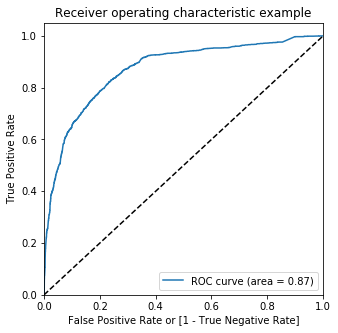

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The AUC is 0.87 which is decent and the curve is not close to the diagnol.

## Finding Optimal Cutoff Point

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.751908    5032          1    1    1    1    1    1    1   
1          0        0.100072    5316          0    1    1    0    0    0    0   
2          0        0.078562    4405          0    1    0    0    0    0    0   
3          1        0.704330    2089          1    1    1    1    1    1    1   
4          1        0.078562    1370          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    1    1    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    0    0  
4    0    0    0    0

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394075  1.000000  0.000000
0.1   0.1  0.577738  0.957175  0.330963
0.2   0.2  0.746140  0.920729  0.632593
0.3   0.3  0.777199  0.853303  0.727704
0.4   0.4  0.799282  0.752620  0.829630
0.5   0.5  0.801436  0.681093  0.879704
0.6   0.6  0.800359  0.618679  0.918519
0.7   0.7  0.771095  0.507062  0.942815
0.8   0.8  0.743447  0.388155  0.974519
0.9   0.9  0.698923  0.254214  0.988148


In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

** From the plot above, 0.35 is the optimum point to take it as a cutoff probability **

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.751908    5032          1    1    1    1    1    1    1   
1          0        0.100072    5316          0    1    1    0    0    0    0   
2          0        0.078562    4405          0    1    0    0    0    0    0   
3          1        0.704330    2089          1    1    1    1    1    1    1   
4          1        0.078562    1370          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  lead_score  
0    1    1    0    0                1   75.190799  
1    0    0    0    0                0   10.007201  
2    0    0    0    0                0    7.856163  
3    1    1    0    0                1   70.433031  
4    0    0    0    0                0    7.856163

### Metrics

In [119]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.78976660682226207

In [120]:
# Calcualte the confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[2618,  757],
       [ 414, 1781]])

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.81138952164009115

In [123]:
# Let us calculate specificity

TN / float(TN+FP)

0.77570370370370367

In [124]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.224296296296


In [125]:
from sklearn.metrics import precision_score, recall_score

In [126]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.70173364854215914

In [127]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.81138952164009115

## Precision and Recall Tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      1
 12      1
 13      0
 14      1
 15      0
 16      1
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      1
 30      0
 31      0
 32      1
 33      1
 34      1
 35      0
 36      0
 37      1
 38      0
 39      0
 40      0
 41      1
 42      1
 43      0
 44      1
 45      0
 46      0
 47      0
 48      0
 49      0
 50      1
 51      0
 52      0
 53      0
 54      1
 55      1
 56      0
 57      0
 58      0
 59      1
 60      1
 61      1
 62      1
 63      1
 64      0
 65      0
 66      0
 67      0
 68      0
 69      0
 70      0
 71      1
 72      1
 73      0
 74      1
 75      0
 76      1
 77      1
 78      0
 79      1
 80      0
 81      1
 82      1
 83      0
 84      0
 85      1
 86      0
 87      1
 88      1
 89      0
 90      1

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**From the curve above, 0.42 is the optimum point to take it as a cutoff probability**

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.751908    5032          1    1    1    1    1    1    1   
1          0        0.100072    5316          0    1    1    0    0    0    0   
2          0        0.078562    4405          0    1    0    0    0    0    0   
3          1        0.704330    2089          1    1    1    1    1    1    1   
4          1        0.078562    1370          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  lead_score  
0    1    1    0    0                1   75.190799  
1    0    0    0    0                0   10.007201  
2    0    0    0    0                0    7.856163  
3    1    1    0    0                1   70.433031  
4    0    0    0    0                0    7.856163

### Metrics

In [133]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80053859964093355

In [134]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion3

array([[2834,  541],
       [ 570, 1625]])

In [135]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.74031890660592259

In [137]:
# Let us calculate specificity

TN / float(TN+FP)

0.83970370370370373

In [138]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.160296296296


In [139]:
from sklearn.metrics import precision_score, recall_score

In [140]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.75023084025854114

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.74031890660592259

## Making predictions on the test set

In [142]:
X_test[['Total_Visits','Time_On_Website','Page_Views']] = scaler.transform(X_test[['Total_Visits','Time_On_Website','Page_Views']])

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [143]:
X_test = X_test[col]
X_test.head()

No_Email  Time_On_Website  Lead_Origin_lead add form  \
3833         0        -0.490814                          0   
2508         0        -0.828478                          0   
5291         0         1.304614                          0   
3892         0        -1.031803                          0   
3254         0        -0.596107                          0   

      Lead_Profile_potential lead  Lead_Profile_student of someschool  \
3833                            0                                   0   
2508                            1                                   0   
5291                            0                                   0   
3892                            0                                   1   
3254                            0                                   0   

      Occupation_working professional  Last_Activity_sms sent  
3833                                0                       1  
2508                                0                       1  
5291                                0                       1  
3892                                0                       0  
3254                                0                       0

In [144]:
X_test_sm = sm.add_constant(X_test)

In [145]:
y_test_pred = res.predict(X_test_sm)

In [146]:
y_test_pred[:10]

3833    0.339469
2508    0.706860
5291    0.735638
3892    0.014144
3254    0.113834
472     0.887379
3156    0.083914
5141    0.694439
3669    0.103740
62      0.870863
dtype: float64

In [147]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head

y_pred_1.head()

0
3833  0.339469
2508  0.706860
5291  0.735638
3892  0.014144
3254  0.113834

In [149]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [150]:
# Putting CustID to index

y_test_df['CustID'] = y_test_df.index

In [151]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [153]:
y_pred_final.head()

Converted  CustID         0
0          0    3833  0.339469
1          1    2508  0.706860
2          1    5291  0.735638
3          0    3892  0.014144
4          0    3254  0.113834

In [154]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [155]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  app.launch_new_instance()


In [156]:
# Let's see the head of y_pred_final

y_pred_final.head()

CustID  Converted  Converted_Prob
0    3833          0        0.339469
1    2508          1        0.706860
2    5291          1        0.735638
3    3892          0        0.014144
4    3254          0        0.113834

We will go with the threshold of 0.42 which yielded better metrics on train set.

In [157]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['lead_score'] = y_pred_final.Converted_Prob * 100

In [158]:
y_pred_final.head()

CustID  Converted  Converted_Prob  final_predicted  lead_score
0    3833          0        0.339469                0   33.946856
1    2508          1        0.706860                1   70.685997
2    5291          1        0.735638                1   73.563838
3    3892          0        0.014144                0    1.414365
4    3254          0        0.113834                0   11.383396

### Metrics

In [159]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.81448911222780573

In [160]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

confusion4

array([[1206,  195],
       [ 248,  739]])

In [161]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.74873353596757852

In [163]:
# Let us calculate specificity

TN / float(TN+FP)

0.86081370449678796

In [164]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.139186295503


In [165]:
# Precision

confusion4[1,1]/(confusion4[0,1]+confusion4[1,1])

0.79122055674518199

In [166]:
# Recall

confusion4[1,1]/(confusion4[1,0]+confusion4[1,1])

0.74873353596757852

**Detail comments and observations on the metrics is provided at the bottom of this notebook and is used for model comparison**

**The approach for splitting data, scaling, RFE, model building logic and variable elimination criteria for the coming models is same as the previous one. Hence, not repeating the same**

# Model 2 (RFE 10)

## Test-Train Split

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)

X.head()

No_Email  Total_Visits  Time_On_Website  Page_Views  Free_Copy  \
0         0           0.0                0         0.0          0   
1         0           5.0              674         2.5          0   
2         0           2.0             1532         2.0          1   
3         0           1.0              305         1.0          0   
4         0           2.0             1428         1.0          0   

   Lead_Origin_landing page submission  Lead_Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_lead import  Lead_Origin_quick add form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Last_Notable_Activity_email bounced             ...              \
0                                    0             ...               
1                                    0             ...               
2                                    0             ...               
3                                    0             ...               
4                                    0             ...               

   Lead_Source_pay per click ads  Lead_Source_press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead_Source_reference  Lead_Source_referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead_Source_social media  Lead_Source_testone  Lead_Source_welearn  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   Lead_Source_welearnblog_home  Lead_Source_welingak website  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Lead_Source_youtubechannel  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 105 columns]

In [169]:
# Putting response variable to y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [170]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [171]:
list(df.columns)

['No_Email',
 'Converted',
 'Total_Visits',
 'Time_On_Website',
 'Page_Views',
 'Free_Copy',
 'Lead_Origin_landing page submission',
 'Lead_Origin_lead add form',
 'Lead_Origin_lead import',
 'Lead_Origin_quick add form',
 'Last_Notable_Activity_email bounced',
 'Last_Notable_Activity_email link clicked',
 'Last_Notable_Activity_email marked spam',
 'Last_Notable_Activity_email opened',
 'Last_Notable_Activity_email received',
 'Last_Notable_Activity_form submitted on website',
 'Last_Notable_Activity_had a phone conversation',
 'Last_Notable_Activity_modified',
 'Last_Notable_Activity_olark chat conversation',
 'Last_Notable_Activity_page visited on website',
 'Last_Notable_Activity_resubscribed to emails',
 'Last_Notable_Activity_sms sent',
 'Last_Notable_Activity_unreachable',
 'Last_Notable_Activity_unsubscribed',
 'Last_Notable_Activity_view in browser link clicked',
 'Specialization_banking, investment and insurance',
 'Specialization_business administration',
 'Specialization_e-

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler = StandardScaler()

X_train[['Total_Visits','Time_On_Website','Page_Views']] = scaler.fit_transform(X_train[['Total_Visits','Time_On_Website','Page_Views']])

X_train.head()

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

No_Email  Total_Visits  Time_On_Website  Page_Views  Free_Copy  \
5032         0      2.405676         1.395384    2.812711          1   
5316         1      0.512754        -0.890202    1.309611          0   
4405         0     -1.380168        -1.031803   -1.492065          0   
2089         0     -0.622999         1.139413   -0.371395          0   
1370         0     -1.380168        -1.031803   -1.492065          0   

      Lead_Origin_landing page submission  Lead_Origin_lead add form  \
5032                                    1                          0   
5316                                    1                          0   
4405                                    0                          0   
2089                                    0                          0   
1370                                    0                          0   

      Lead_Origin_lead import  Lead_Origin_quick add form  \
5032                        0                           0   
5316                        0                           0   
4405                        0                           0   
2089                        0                           0   
1370                        0                           0   

      Last_Notable_Activity_email bounced             ...              \
5032                                    0             ...               
5316                                    0             ...               
4405                                    0             ...               
2089                                    0             ...               
1370                                    0             ...               

      Lead_Source_pay per click ads  Lead_Source_press_release  \
5032                              0                          0   
5316                              0                          0   
4405                              0                          0   
2089                              0                          0   
1370                              0                          0   

      Lead_Source_reference  Lead_Source_referral sites  \
5032                      0                           0   
5316                      0                           0   
4405                      0                           0   
2089                      0                           0   
1370                      0                           0   

      Lead_Source_social media  Lead_Source_testone  Lead_Source_welearn  \
5032                         0                    0                    0   
5316                         0                    0                    0   
4405                         0                    0                    0   
2089                         0                    0                    0   
1370                         0                    0                    0   

      Lead_Source_welearnblog_home  Lead_Source_welingak website  \
5032                             0                             0   
5316                             0                             0   
4405                             0                             0   
2089                             0                             0   
1370                             0                             0   

      Lead_Source_youtubechannel  
5032                           0  
5316                           0  
4405                           0  
2089                           0  
1370                           0  

[5 rows x 105 columns]

## Feature Selection Using RFE

In [174]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [175]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10) # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [176]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('No_Email', False, 4),
 ('Total_Visits', False, 39),
 ('Time_On_Website', False, 6),
 ('Page_Views', False, 40),
 ('Free_Copy', False, 88),
 ('Lead_Origin_landing page submission', False, 44),
 ('Lead_Origin_lead add form', True, 1),
 ('Lead_Origin_lead import', False, 47),
 ('Lead_Origin_quick add form', False, 38),
 ('Last_Notable_Activity_email bounced', False, 69),
 ('Last_Notable_Activity_email link clicked', False, 29),
 ('Last_Notable_Activity_email marked spam', False, 68),
 ('Last_Notable_Activity_email opened', False, 14),
 ('Last_Notable_Activity_email received', False, 94),
 ('Last_Notable_Activity_form submitted on website', False, 81),
 ('Last_Notable_Activity_had a phone conversation', False, 2),
 ('Last_Notable_Activity_modified', False, 7),
 ('Last_Notable_Activity_olark chat conversation', False, 13),
 ('Last_Notable_Activity_page visited on website', False, 35),
 ('Last_Notable_Activity_resubscribed to emails', False, 19),
 ('Last_Notable_Activity_sms sent', False,

In [177]:
col = X_train.columns[rfe.support_]

col

Index(['Lead_Origin_lead add form', 'Lead_Profile_dual specialization student',
       'Lead_Profile_lateral student', 'Lead_Profile_potential lead',
       'Lead_Profile_student of someschool', 'Occupation_housewife',
       'Occupation_working professional', 'Last_Activity_approached upfront',
       'Last_Activity_sms sent', 'Lead_Source_welingak website'],
      dtype='object')

In [178]:
X_train.columns[~rfe.support_]

Index(['No_Email', 'Total_Visits', 'Time_On_Website', 'Page_Views',
       'Free_Copy', 'Lead_Origin_landing page submission',
       'Lead_Origin_lead import', 'Lead_Origin_quick add form',
       'Last_Notable_Activity_email bounced',
       'Last_Notable_Activity_email link clicked',
       'Last_Notable_Activity_email marked spam',
       'Last_Notable_Activity_email opened',
       'Last_Notable_Activity_email received',
       'Last_Notable_Activity_form submitted on website',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_modified',
       'Last_Notable_Activity_olark chat conversation',
       'Last_Notable_Activity_page visited on website',
       'Last_Notable_Activity_resubscribed to emails',
       'Last_Notable_Activity_sms sent', 'Last_Notable_Activity_unreachable',
       'Last_Notable_Activity_unsubscribed',
       'Last_Notable_Activity_view in browser link clicked',
       'Specialization_banking, investment and insurance',
    

## Model Building

In [179]:
import statsmodels.api as sm
from sklearn import metrics

# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [180]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5559
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2780.7
Date:                Sat, 02 Mar 2019   Deviance:                       5561.4
Time:                        16:49:38   Pearson chi2:                 6.16e+03
No. Iterations:                    22                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5053      0.047    -32.000      0.000      -1.597      -1.413
Lead_Origin_lead add form                    2.1864      0.206     10.588      0.000       1.782       2.591
Lead_Profile_dual specialization student    24.1344   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
Lead_Profile_lateral student                 3.2850      1.072      3.064      0.002       1.184       5.386
Lead_Profile_potential lead                  1.9465      0.090     21.636      0.000       1.770       2.123
Lead_Profile_student of someschool          -1.7734      0.422     -4.203      0.000      -2.600      -0.946
Occupation_housewife                        23.5717   2.35e+04      0.001      0.999   -4.61e+04    4.62e+04
Occupation_working professional              2.4182      0.178     13.568      0.000       2.069       2.768
Last_Activity_approached upfront            25.0714   3.97e+04      0.001      0.999   -7.78e+04    7.79e+04
Last_Activity_sms sent                       1.3624      0.070     19.514      0.000       1.226       1.499
Lead_Source_welingak website                 2.7203      1.035      2.629      0.009       0.692       4.749
============================================================================================================
"""

In [181]:
model_accuracy(res, X_train_sm, y_train)

[[3093  282]
 [1056 1139]]
0.759784560144


In [182]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9              Lead_Source_welingak website  1.18
2              Lead_Profile_lateral student  1.01
5                      Occupation_housewife  1.01
1  Lead_Profile_dual specialization student  1.00
4        Lead_Profile_student of someschool  1.00
7          Last_Activity_approached upfront  1.00
6           Occupation_working professional  0.45
0                 Lead_Origin_lead add form  0.38
8                    Last_Activity_sms sent  0.11
3               Lead_Profile_potential lead  0.03

In [183]:
col = col.drop('Occupation_housewife', 1)
col

Index(['Lead_Origin_lead add form', 'Lead_Profile_dual specialization student',
       'Lead_Profile_lateral student', 'Lead_Profile_potential lead',
       'Lead_Profile_student of someschool', 'Occupation_working professional',
       'Last_Activity_approached upfront', 'Last_Activity_sms sent',
       'Lead_Source_welingak website'],
      dtype='object')

In [184]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5560
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2786.0
Date:                Sat, 02 Mar 2019   Deviance:                       5572.0
Time:                        16:49:38   Pearson chi2:                 6.19e+03
No. Iterations:                    21                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5008      0.047    -31.957      0.000      -1.593      -1.409
Lead_Origin_lead add form                    2.2155      0.206     10.756      0.000       1.812       2.619
Lead_Profile_dual specialization student    23.1323   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Lead_Profile_lateral student                 3.2784      1.072      3.057      0.002       1.177       5.380
Lead_Profile_potential lead                  1.9479      0.090     21.672      0.000       1.772       2.124
Lead_Profile_student of someschool          -1.7775      0.422     -4.213      0.000      -2.604      -0.951
Occupation_working professional              2.4140      0.178     13.544      0.000       2.065       2.763
Last_Activity_approached upfront            24.0669   2.41e+04      0.001      0.999   -4.72e+04    4.73e+04
Last_Activity_sms sent                       1.3575      0.070     19.455      0.000       1.221       1.494
Lead_Source_welingak website                 2.6875      1.035      2.597      0.009       0.659       4.716
============================================================================================================
"""

In [185]:
model_accuracy(res, X_train_sm, y_train)

[[3093  282]
 [1058 1137]]
0.759425493716


In [186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8              Lead_Source_welingak website  1.18
2              Lead_Profile_lateral student  1.01
1  Lead_Profile_dual specialization student  1.00
4        Lead_Profile_student of someschool  1.00
6          Last_Activity_approached upfront  1.00
5           Occupation_working professional  0.45
0                 Lead_Origin_lead add form  0.37
7                    Last_Activity_sms sent  0.11
3               Lead_Profile_potential lead  0.03

In [187]:
col = col.drop('Lead_Profile_dual specialization student', 1)

In [188]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5561
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2795.9
Date:                Sat, 02 Mar 2019   Deviance:                       5591.8
Time:                        16:49:38   Pearson chi2:                 6.20e+03
No. Iterations:                    20                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.4930      0.047    -31.885      0.000      -1.585      -1.401
Lead_Origin_lead add form              2.2095      0.206     10.730      0.000       1.806       2.613
Lead_Profile_lateral student           3.2708      1.072      3.050      0.002       1.169       5.372
Lead_Profile_potential lead            1.9402      0.090     21.599      0.000       1.764       2.116
Lead_Profile_student of someschool    -1.7859      0.422     -4.232      0.000      -2.613      -0.959
Occupation_working professional        2.4283      0.178     13.648      0.000       2.080       2.777
Last_Activity_approached upfront      23.0590   1.46e+04      0.002      0.999   -2.86e+04    2.87e+04
Last_Activity_sms sent                 1.3551      0.070     19.457      0.000       1.219       1.492
Lead_Source_welingak website           2.6861      1.035      2.596      0.009       0.658       4.714
======================================================================================================
"""

In [189]:
model_accuracy(res, X_train_sm, y_train)

[[3093  282]
 [1065 1130]]
0.758168761221


In [190]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7        Lead_Source_welingak website  1.18
1        Lead_Profile_lateral student  1.01
3  Lead_Profile_student of someschool  1.00
5    Last_Activity_approached upfront  1.00
4     Occupation_working professional  0.45
0           Lead_Origin_lead add form  0.37
6              Last_Activity_sms sent  0.11
2         Lead_Profile_potential lead  0.03

In [191]:
col = col.drop('Last_Activity_approached upfront', 1)

In [192]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5562
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2802.7
Date:                Sat, 02 Mar 2019   Deviance:                       5605.3
Time:                        16:49:38   Pearson chi2:                 6.20e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.4858      0.047    -31.823      0.000      -1.577      -1.394
Lead_Origin_lead add form              2.2051      0.206     10.714      0.000       1.802       2.609
Lead_Profile_lateral student           3.2645      1.072      3.045      0.002       1.163       5.366
Lead_Profile_potential lead            1.9347      0.090     21.554      0.000       1.759       2.111
Lead_Profile_student of someschool    -1.7926      0.422     -4.249      0.000      -2.620      -0.966
Occupation_working professional        2.4239      0.178     13.629      0.000       2.075       2.772
Last_Activity_sms sent                 1.3486      0.070     19.389      0.000       1.212       1.485
Lead_Source_welingak website           2.6844      1.035      2.594      0.009       0.656       4.712
======================================================================================================
"""

In [193]:
model_accuracy(res, X_train_sm, y_train)

[[3093  282]
 [1069 1126]]
0.757450628366


In [194]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6        Lead_Source_welingak website  1.18
1        Lead_Profile_lateral student  1.01
3  Lead_Profile_student of someschool  1.00
4     Occupation_working professional  0.45
0           Lead_Origin_lead add form  0.37
5              Last_Activity_sms sent  0.11
2         Lead_Profile_potential lead  0.03

In [195]:
    # Getting the predicted values on the train set

    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['CustID'] = y_train.index

    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

    from sklearn import metrics

    # Confusion matrix 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    print(confusion)

    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3093  282]
 [1069 1126]]
0.757450628366


The final accuracy of the model on the training set with 0.5 threshold is 75.7%.

## Plotting the ROC Curve

In [196]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [197]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The AUC is 0.80 which is decent and the curve is not very close to the diagnol.

## Finding Optimal Cutoff Point

In [198]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.465758    5032          0    1    1    1    1    1    0   
1          0        0.465758    5316          0    1    1    1    1    1    0   
2          0        0.184549    4405          0    1    1    0    0    0    0   
3          1        0.465758    2089          0    1    1    1    1    1    0   
4          1        0.184549    1370          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [199]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394075  1.000000  0.000000
0.1   0.1  0.419210  0.997722  0.042963
0.2   0.2  0.750269  0.774943  0.734222
0.3   0.3  0.750090  0.774487  0.734222
0.4   0.4  0.750090  0.774487  0.734222
0.5   0.5  0.757451  0.512984  0.916444
0.6   0.6  0.757451  0.512984  0.916444
0.7   0.7  0.721185  0.343508  0.966815
0.8   0.8  0.713824  0.312073  0.975111
0.9   0.9  0.686894  0.216856  0.992593


In [200]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the plot above, 0.42 is the optimum point to take it as a cutoff probability**

In [201]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.465758    5032          0    1    1    1    1    1    0   
1          0        0.465758    5316          0    1    1    1    1    1    0   
2          0        0.184549    4405          0    1    1    0    0    0    0   
3          1        0.465758    2089          0    1    1    1    1    1    0   
4          1        0.184549    1370          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  lead_score  
0    0    0    0    0                1   46.575797  
1    0    0    0    0                1   46.575797  
2    0    0    0    0                0   18.454945  
3    0    0    0    0                1   46.575797  
4    0    0    0    0                0   18.454945

### Metrics

In [202]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.75008976660682225

In [203]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[2478,  897],
       [ 495, 1700]])

In [204]:
TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [205]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7744874715261959

In [206]:
# Let us calculate specificity

TN / float(TN+FP)

0.73422222222222222

In [207]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.265777777778


In [208]:
from sklearn.metrics import precision_score, recall_score

In [209]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.65460146322680013

In [210]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7744874715261959

## Precision and Recall

## Precision and recall tradeoff

In [211]:
from sklearn.metrics import precision_recall_curve

In [212]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      1
 12      1
 13      0
 14      1
 15      0
 16      1
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      1
 30      0
 31      0
 32      1
 33      1
 34      1
 35      0
 36      0
 37      1
 38      0
 39      0
 40      0
 41      1
 42      1
 43      0
 44      1
 45      0
 46      0
 47      0
 48      0
 49      0
 50      1
 51      0
 52      0
 53      0
 54      1
 55      1
 56      0
 57      0
 58      0
 59      1
 60      1
 61      1
 62      1
 63      1
 64      0
 65      0
 66      0
 67      0
 68      0
 69      0
 70      0
 71      1
 72      1
 73      0
 74      1
 75      0
 76      1
 77      1
 78      0
 79      1
 80      0
 81      1
 82      1
 83      0
 84      0
 85      1
 86      0
 87      1
 88      1
 89      0
 90      1

In [213]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

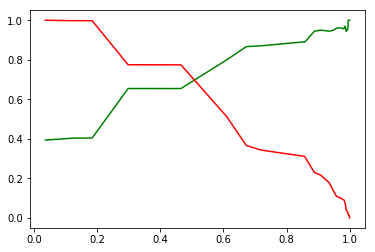

In [214]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**From the plot above, 0.52 is the optimum point to take it as a cutoff probability**

In [215]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.52 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.465758    5032          0    1    1    1    1    1    0   
1          0        0.465758    5316          0    1    1    1    1    1    0   
2          0        0.184549    4405          0    1    1    0    0    0    0   
3          1        0.465758    2089          0    1    1    1    1    1    0   
4          1        0.184549    1370          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  lead_score  
0    0    0    0    0                0   46.575797  
1    0    0    0    0                0   46.575797  
2    0    0    0    0                0   18.454945  
3    0    0    0    0                0   46.575797  
4    0    0    0    0                0   18.454945

### Metrics

In [216]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.75745062836624777

In [217]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion3

array([[3093,  282],
       [1069, 1126]])

In [218]:
TP = confusion3[1,1] # true positives
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.51298405466970387

In [220]:
# Let us calculate specificity

TN / float(TN+FP)

0.91644444444444439

In [221]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.0835555555556


In [222]:
from sklearn.metrics import precision_score, recall_score

In [223]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.79971590909090906

In [224]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.51298405466970387

## Making predictions on the test set

In [225]:
X_test[['Total_Visits','Time_On_Website','Page_Views']] = scaler.transform(X_test[['Total_Visits','Time_On_Website','Page_Views']])

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [226]:
X_test = X_test[col]
X_test.head()

Lead_Origin_lead add form  Lead_Profile_lateral student  \
3833                          0                             0   
2508                          0                             0   
5291                          0                             0   
3892                          0                             0   
3254                          0                             0   

      Lead_Profile_potential lead  Lead_Profile_student of someschool  \
3833                            0                                   0   
2508                            1                                   0   
5291                            0                                   0   
3892                            0                                   1   
3254                            0                                   0   

      Occupation_working professional  Last_Activity_sms sent  \
3833                                0                       1   
2508                                0                       1   
5291                                0                       1   
3892                                0                       0   
3254                                0                       0   

      Lead_Source_welingak website  
3833                             0  
2508                             0  
5291                             0  
3892                             0  
3254                             0

In [227]:
X_test_sm = sm.add_constant(X_test)

In [228]:
y_test_pred = res.predict(X_test_sm)

In [229]:
y_test_pred[:10]

3833    0.465758
2508    0.857844
5291    0.465758
3892    0.036320
3254    0.184549
472     0.718711
3156    0.184549
5141    0.672452
3669    0.184549
62      0.610367
dtype: float64

In [230]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [231]:
# Let's see the head

y_pred_1.head()

0
3833  0.465758
2508  0.857844
5291  0.465758
3892  0.036320
3254  0.184549

In [232]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [233]:
# Putting CustID to index

y_test_df['CustID'] = y_test_df.index

In [234]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [235]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [236]:
y_pred_final.head()

Converted  CustID         0
0          0    3833  0.465758
1          1    2508  0.857844
2          1    5291  0.465758
3          0    3892  0.036320
4          0    3254  0.184549

In [237]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [238]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  app.launch_new_instance()


In [239]:
# Let's see the head of y_pred_final

y_pred_final.head()

CustID  Converted  Converted_Prob
0    3833          0        0.465758
1    2508          1        0.857844
2    5291          1        0.465758
3    3892          0        0.036320
4    3254          0        0.184549

We will go with the threshold of 0.52 which yielded better metrics on train set.

In [240]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.52 else 0)
y_pred_final['lead_score'] = y_pred_final.Converted_Prob * 100

In [241]:
y_pred_final.head()

CustID  Converted  Converted_Prob  final_predicted  lead_score
0    3833          0        0.465758                0   46.575797
1    2508          1        0.857844                1   85.784378
2    5291          1        0.465758                0   46.575797
3    3892          0        0.036320                0    3.631970
4    3254          0        0.184549                0   18.454945

### Metrics

In [242]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7529313232830821

In [243]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

confusion4

array([[1282,  119],
       [ 471,  516]])

In [244]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [245]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.52279635258358659

In [246]:
# Let us calculate specificity

TN / float(TN+FP)

0.91506067094932186

In [247]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.0849393290507


In [248]:
# Precision

confusion4[1,1]/(confusion4[0,1]+confusion4[1,1])

0.81259842519685044

In [249]:
# Recall

confusion4[1,1]/(confusion4[1,0]+confusion4[1,1])

0.52279635258358659

**Detail comments and observations on the metrics is provided at the bottom of this notebook and is used for model comparison**

# Model 3 (RFE 20)

## Test-Train Split

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
# Putting feature variable to X

X = df.drop(['Converted'], axis=1)

X.head()

No_Email  Total_Visits  Time_On_Website  Page_Views  Free_Copy  \
0         0           0.0                0         0.0          0   
1         0           5.0              674         2.5          0   
2         0           2.0             1532         2.0          1   
3         0           1.0              305         1.0          0   
4         0           2.0             1428         1.0          0   

   Lead_Origin_landing page submission  Lead_Origin_lead add form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead_Origin_lead import  Lead_Origin_quick add form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Last_Notable_Activity_email bounced             ...              \
0                                    0             ...               
1                                    0             ...               
2                                    0             ...               
3                                    0             ...               
4                                    0             ...               

   Lead_Source_pay per click ads  Lead_Source_press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead_Source_reference  Lead_Source_referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead_Source_social media  Lead_Source_testone  Lead_Source_welearn  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

   Lead_Source_welearnblog_home  Lead_Source_welingak website  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Lead_Source_youtubechannel  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 105 columns]

In [252]:
# Putting response variable to y

y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [253]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
scaler = StandardScaler()

X_train[['Total_Visits','Time_On_Website','Page_Views']] = scaler.fit_transform(X_train[['Total_Visits','Time_On_Website','Page_Views']])

X_train.head()

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

No_Email  Total_Visits  Time_On_Website  Page_Views  Free_Copy  \
5032         0      2.405676         1.395384    2.812711          1   
5316         1      0.512754        -0.890202    1.309611          0   
4405         0     -1.380168        -1.031803   -1.492065          0   
2089         0     -0.622999         1.139413   -0.371395          0   
1370         0     -1.380168        -1.031803   -1.492065          0   

      Lead_Origin_landing page submission  Lead_Origin_lead add form  \
5032                                    1                          0   
5316                                    1                          0   
4405                                    0                          0   
2089                                    0                          0   
1370                                    0                          0   

      Lead_Origin_lead import  Lead_Origin_quick add form  \
5032                        0                           0   
5316                        0                           0   
4405                        0                           0   
2089                        0                           0   
1370                        0                           0   

      Last_Notable_Activity_email bounced             ...              \
5032                                    0             ...               
5316                                    0             ...               
4405                                    0             ...               
2089                                    0             ...               
1370                                    0             ...               

      Lead_Source_pay per click ads  Lead_Source_press_release  \
5032                              0                          0   
5316                              0                          0   
4405                              0                          0   
2089                              0                          0   
1370                              0                          0   

      Lead_Source_reference  Lead_Source_referral sites  \
5032                      0                           0   
5316                      0                           0   
4405                      0                           0   
2089                      0                           0   
1370                      0                           0   

      Lead_Source_social media  Lead_Source_testone  Lead_Source_welearn  \
5032                         0                    0                    0   
5316                         0                    0                    0   
4405                         0                    0                    0   
2089                         0                    0                    0   
1370                         0                    0                    0   

      Lead_Source_welearnblog_home  Lead_Source_welingak website  \
5032                             0                             0   
5316                             0                             0   
4405                             0                             0   
2089                             0                             0   
1370                             0                             0   

      Lead_Source_youtubechannel  
5032                           0  
5316                           0  
4405                           0  
2089                           0  
1370                           0  

[5 rows x 105 columns]

In [256]:
X_train[['Total_Visits','Time_On_Website','Page_Views']].describe()

Total_Visits  Time_On_Website    Page_Views
count  5.570000e+03     5.570000e+03  5.570000e+03
mean  -7.201899e-16     4.267482e-17  1.873626e-17
std    1.000090e+00     1.000090e+00  1.000090e+00
min   -1.380168e+00    -1.031803e+00 -1.492065e+00
25%   -6.229990e-01    -8.393706e-01 -5.955289e-01
50%   -2.444146e-01    -4.218291e-01 -3.713947e-01
75%    5.127541e-01     8.671035e-01  7.492760e-01
max    2.405676e+00     3.092781e+00  2.812711e+00

## Feature Selection Using RFE

In [257]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [258]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20) # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

In [259]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False], dtype=bool)

In [260]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('No_Email', True, 1),
 ('Total_Visits', False, 29),
 ('Time_On_Website', True, 1),
 ('Page_Views', False, 30),
 ('Free_Copy', False, 78),
 ('Lead_Origin_landing page submission', False, 34),
 ('Lead_Origin_lead add form', True, 1),
 ('Lead_Origin_lead import', False, 37),
 ('Lead_Origin_quick add form', False, 28),
 ('Last_Notable_Activity_email bounced', False, 59),
 ('Last_Notable_Activity_email link clicked', False, 19),
 ('Last_Notable_Activity_email marked spam', False, 58),
 ('Last_Notable_Activity_email opened', False, 4),
 ('Last_Notable_Activity_email received', False, 84),
 ('Last_Notable_Activity_form submitted on website', False, 71),
 ('Last_Notable_Activity_had a phone conversation', True, 1),
 ('Last_Notable_Activity_modified', True, 1),
 ('Last_Notable_Activity_olark chat conversation', False, 3),
 ('Last_Notable_Activity_page visited on website', False, 25),
 ('Last_Notable_Activity_resubscribed to emails', False, 9),
 ('Last_Notable_Activity_sms sent', False, 60),
 

In [261]:
col = X_train.columns[rfe.support_]

col

Index(['No_Email', 'Time_On_Website', 'Lead_Origin_lead add form',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_modified', 'Last_Notable_Activity_unreachable',
       'Lead_Profile_dual specialization student',
       'Lead_Profile_lateral student', 'Lead_Profile_potential lead',
       'Lead_Profile_student of someschool', 'Occupation_housewife',
       'Occupation_other', 'Occupation_working professional',
       'Last_Activity_approached upfront', 'Last_Activity_sms sent',
       'Lead_Source_direct traffic', 'Lead_Source_facebook',
       'Lead_Source_google', 'Lead_Source_organic search',
       'Lead_Source_welingak website'],
      dtype='object')

In [262]:
X_train.columns[~rfe.support_]

Index(['Total_Visits', 'Page_Views', 'Free_Copy',
       'Lead_Origin_landing page submission', 'Lead_Origin_lead import',
       'Lead_Origin_quick add form', 'Last_Notable_Activity_email bounced',
       'Last_Notable_Activity_email link clicked',
       'Last_Notable_Activity_email marked spam',
       'Last_Notable_Activity_email opened',
       'Last_Notable_Activity_email received',
       'Last_Notable_Activity_form submitted on website',
       'Last_Notable_Activity_olark chat conversation',
       'Last_Notable_Activity_page visited on website',
       'Last_Notable_Activity_resubscribed to emails',
       'Last_Notable_Activity_sms sent', 'Last_Notable_Activity_unsubscribed',
       'Last_Notable_Activity_view in browser link clicked',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare

## Model Building

In [263]:
import statsmodels.api as sm
from sklearn import metrics

# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5549
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2263.3
Date:                Sat, 02 Mar 2019   Deviance:                       4526.5
Time:                        16:49:43   Pearson chi2:                 6.28e+03
No. Iterations:                    22                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3569      0.117     -3.051      0.002      -0.586      -0.128
No_Email                                          -1.0453      0.167     -6.278      0.000      -1.372      -0.719
Time_On_Website                                    1.0200      0.040     25.355      0.000       0.941       1.099
Lead_Origin_lead add form                          2.1248      0.233      9.105      0.000       1.667       2.582
Last_Notable_Activity_had a phone conversation     2.5427      1.193      2.131      0.033       0.204       4.882
Last_Notable_Activity_modified                    -0.9571      0.085    -11.316      0.000      -1.123      -0.791
Last_Notable_Activity_unreachable                  1.6379      0.607      2.696      0.007       0.447       2.828
Lead_Profile_dual specialization student          23.6421   2.15e+04      0.001      0.999    -4.2e+04    4.21e+04
Lead_Profile_lateral student                       2.9649      1.076      2.754      0.006       0.855       5.075
Lead_Profile_potential lead                        1.8855      0.101     18.706      0.000       1.688       2.083
Lead_Profile_student of someschool                -1.8403      0.450     -4.093      0.000      -2.722      -0.959
Occupation_housewife                              23.8565   2.31e+04      0.001      0.999   -4.53e+04    4.53e+04
Occupation_other                                   1.8662      0.718      2.600      0.009       0.459       3.273
Occupation_working professional                    2.3761      0.192     12.377      0.000       2.000       2.752
Last_Activity_approached upfront                  24.8000   3.63e+04      0.001      0.999   -7.11e+04    7.12e+04
Last_Activity_sms sent                             1.2779      0.080     15.989      0.000       1.121       1.435
Lead_Source_direct traffic                        -1.1276      0.132     -8.551      0.000      -1.386      -0.869
Lead_Source_facebook                              -1.0344      0.510     -2.030      0.042      -2.033      -0.036
Lead_Source_google                                -0.9180      0.129     -7.103      0.000      -1.171      -0.665
Lead_Source_organic search                        -1.0060      0.150     -6.712      0.000      -1.300      -0.712
Lead_Source_welingak website                       2.8447      1.040      2.736      0.006       0.807       4.882
==================================================================================================================
"""

In [265]:
model_accuracy(res, X_train_sm, y_train)

[[2973  402]
 [ 627 1568]]
0.81526032316


In [266]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                   Last_Notable_Activity_modified  1.57
17                              Lead_Source_google  1.52
2                        Lead_Origin_lead add form  1.48
14                          Last_Activity_sms sent  1.48
15                      Lead_Source_direct traffic  1.47
8                      Lead_Profile_potential lead  1.38
18                      Lead_Source_organic search  1.22
19                    Lead_Source_welingak website  1.18
12                 Occupation_working professional  1.18
0                                         No_Email  1.14
1                                  Time_On_Website  1.07
9               Lead_Profile_student of someschool  1.05
16                            Lead_Source_facebook  1.02
7                     Lead_Profile_lateral student  1.01
6         Lead_Profile_dual specialization student  1.01
5                Last_Notable_Activity_unreachable  1.01
3   Last_Notable_Activity_had a phone conversation  1.01
10                            Occupation_housewife  1.01
11                                Occupation_other  1.00
13                Last_Activity_approached upfront  1.00

In [267]:
col = col.drop('Lead_Profile_dual specialization student', 1)
col

Index(['No_Email', 'Time_On_Website', 'Lead_Origin_lead add form',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_modified', 'Last_Notable_Activity_unreachable',
       'Lead_Profile_lateral student', 'Lead_Profile_potential lead',
       'Lead_Profile_student of someschool', 'Occupation_housewife',
       'Occupation_other', 'Occupation_working professional',
       'Last_Activity_approached upfront', 'Last_Activity_sms sent',
       'Lead_Source_direct traffic', 'Lead_Source_facebook',
       'Lead_Source_google', 'Lead_Source_organic search',
       'Lead_Source_welingak website'],
      dtype='object')

In [268]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5550
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2270.4
Date:                Sat, 02 Mar 2019   Deviance:                       4540.7
Time:                        16:49:43   Pearson chi2:                 6.29e+03
No. Iterations:                    21                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3471      0.117     -2.973      0.003      -0.576      -0.118
No_Email                                          -1.0279      0.166     -6.209      0.000      -1.352      -0.703
Time_On_Website                                    1.0210      0.040     25.401      0.000       0.942       1.100
Lead_Origin_lead add form                          2.1194      0.233      9.088      0.000       1.662       2.577
Last_Notable_Activity_had a phone conversation     2.5371      1.193      2.126      0.033       0.198       4.876
Last_Notable_Activity_modified                    -0.9653      0.085    -11.422      0.000      -1.131      -0.800
Last_Notable_Activity_unreachable                  1.6299      0.607      2.684      0.007       0.440       2.820
Lead_Profile_lateral student                       2.9602      1.076      2.750      0.006       0.851       5.070
Lead_Profile_potential lead                        1.8795      0.101     18.649      0.000       1.682       2.077
Lead_Profile_student of someschool                -1.8481      0.450     -4.109      0.000      -2.730      -0.967
Occupation_housewife                              22.8467    1.4e+04      0.002      0.999   -2.75e+04    2.75e+04
Occupation_other                                   1.8608      0.718      2.593      0.010       0.454       3.267
Occupation_working professional                    2.3800      0.192     12.420      0.000       2.004       2.756
Last_Activity_approached upfront                  23.7965    2.2e+04      0.001      0.999   -4.31e+04    4.32e+04
Last_Activity_sms sent                             1.2767      0.080     16.000      0.000       1.120       1.433
Lead_Source_direct traffic                        -1.1312      0.132     -8.593      0.000      -1.389      -0.873
Lead_Source_facebook                              -1.0368      0.509     -2.035      0.042      -2.035      -0.038
Lead_Source_google                                -0.9202      0.129     -7.133      0.000      -1.173      -0.667
Lead_Source_organic search                        -0.9990      0.149     -6.687      0.000      -1.292      -0.706
Lead_Source_welingak website                       2.8425      1.040      2.734      0.006       0.805       4.880
==================================================================================================================
"""

In [269]:
model_accuracy(res, X_train_sm, y_train)

[[2973  402]
 [ 628 1567]]
0.815080789946


In [270]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                   Last_Notable_Activity_modified  1.57
16                              Lead_Source_google  1.52
2                        Lead_Origin_lead add form  1.48
13                          Last_Activity_sms sent  1.48
14                      Lead_Source_direct traffic  1.47
7                      Lead_Profile_potential lead  1.38
17                      Lead_Source_organic search  1.22
18                    Lead_Source_welingak website  1.18
11                 Occupation_working professional  1.17
0                                         No_Email  1.14
1                                  Time_On_Website  1.07
8               Lead_Profile_student of someschool  1.05
15                            Lead_Source_facebook  1.02
6                     Lead_Profile_lateral student  1.01
5                Last_Notable_Activity_unreachable  1.01
3   Last_Notable_Activity_had a phone conversation  1.01
9                             Occupation_housewife  1.01
10                                Occupation_other  1.00
12                Last_Activity_approached upfront  1.00

In [271]:
col = col.drop('Occupation_housewife', 1)

In [272]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5551
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2275.9
Date:                Sat, 02 Mar 2019   Deviance:                       4551.8
Time:                        16:49:43   Pearson chi2:                 6.33e+03
No. Iterations:                    20                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3453      0.117     -2.959      0.003      -0.574      -0.117
No_Email                                          -1.0330      0.166     -6.238      0.000      -1.358      -0.708
Time_On_Website                                    1.0192      0.040     25.382      0.000       0.940       1.098
Lead_Origin_lead add form                          2.1556      0.233      9.269      0.000       1.700       2.611
Last_Notable_Activity_had a phone conversation     2.5289      1.193      2.119      0.034       0.190       4.868
Last_Notable_Activity_modified                    -0.9672      0.084    -11.459      0.000      -1.133      -0.802
Last_Notable_Activity_unreachable                  1.6213      0.607      2.671      0.008       0.432       2.811
Lead_Profile_lateral student                       2.9467      1.077      2.737      0.006       0.836       5.057
Lead_Profile_potential lead                        1.8797      0.101     18.676      0.000       1.682       2.077
Lead_Profile_student of someschool                -1.8522      0.450     -4.120      0.000      -2.733      -0.971
Occupation_other                                   1.8538      0.717      2.585      0.010       0.448       3.259
Occupation_working professional                    2.3742      0.192     12.391      0.000       1.999       2.750
Last_Activity_approached upfront                  22.7925   1.33e+04      0.002      0.999   -2.61e+04    2.62e+04
Last_Activity_sms sent                             1.2695      0.080     15.926      0.000       1.113       1.426
Lead_Source_direct traffic                        -1.1255      0.132     -8.556      0.000      -1.383      -0.868
Lead_Source_facebook                              -1.0349      0.509     -2.032      0.042      -2.033      -0.037
Lead_Source_google                                -0.9160      0.129     -7.105      0.000      -1.169      -0.663
Lead_Source_organic search                        -0.9867      0.149     -6.615      0.000      -1.279      -0.694
Lead_Source_welingak website                       2.8077      1.039      2.701      0.007       0.770       4.845
==================================================================================================================
"""

In [273]:
model_accuracy(res, X_train_sm, y_train)

[[2971  404]
 [ 631 1564]]
0.814183123878


In [274]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                   Last_Notable_Activity_modified  1.57
15                              Lead_Source_google  1.51
12                          Last_Activity_sms sent  1.48
2                        Lead_Origin_lead add form  1.47
13                      Lead_Source_direct traffic  1.47
7                      Lead_Profile_potential lead  1.38
16                      Lead_Source_organic search  1.22
17                    Lead_Source_welingak website  1.18
10                 Occupation_working professional  1.17
0                                         No_Email  1.14
1                                  Time_On_Website  1.07
8               Lead_Profile_student of someschool  1.05
14                            Lead_Source_facebook  1.02
6                     Lead_Profile_lateral student  1.01
5                Last_Notable_Activity_unreachable  1.01
3   Last_Notable_Activity_had a phone conversation  1.01
11                Last_Activity_approached upfront  1.00
9                                 Occupation_other  1.00

In [275]:
col = col.drop('Last_Activity_approached upfront', 1)

In [276]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5552
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2281.4
Date:                Sat, 02 Mar 2019   Deviance:                       4562.7
Time:                        16:49:44   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3342      0.116     -2.869      0.004      -0.562      -0.106
No_Email                                          -1.0379      0.165     -6.272      0.000      -1.362      -0.714
Time_On_Website                                    1.0213      0.040     25.456      0.000       0.943       1.100
Lead_Origin_lead add form                          2.1453      0.232      9.231      0.000       1.690       2.601
Last_Notable_Activity_had a phone conversation     2.5310      1.193      2.121      0.034       0.192       4.870
Last_Notable_Activity_modified                    -0.9565      0.084    -11.364      0.000      -1.121      -0.791
Last_Notable_Activity_unreachable                  1.6193      0.607      2.669      0.008       0.430       2.809
Lead_Profile_lateral student                       2.9429      1.077      2.733      0.006       0.832       5.054
Lead_Profile_potential lead                        1.8737      0.101     18.634      0.000       1.677       2.071
Lead_Profile_student of someschool                -1.8599      0.450     -4.137      0.000      -2.741      -0.979
Occupation_other                                   1.8434      0.717      2.571      0.010       0.438       3.248
Occupation_working professional                    2.3697      0.191     12.376      0.000       1.994       2.745
Last_Activity_sms sent                             1.2643      0.080     15.875      0.000       1.108       1.420
Lead_Source_direct traffic                        -1.1314      0.131     -8.616      0.000      -1.389      -0.874
Lead_Source_facebook                              -1.0483      0.509     -2.059      0.040      -2.046      -0.050
Lead_Source_google                                -0.9277      0.129     -7.206      0.000      -1.180      -0.675
Lead_Source_organic search                        -0.9904      0.149     -6.652      0.000      -1.282      -0.699
Lead_Source_welingak website                       2.8052      1.039      2.699      0.007       0.768       4.842
==================================================================================================================
"""

In [277]:
model_accuracy(res, X_train_sm, y_train)

[[2971  404]
 [ 633 1562]]
0.813824057451


In [278]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                   Last_Notable_Activity_modified  1.56
14                              Lead_Source_google  1.51
11                          Last_Activity_sms sent  1.48
2                        Lead_Origin_lead add form  1.47
12                      Lead_Source_direct traffic  1.47
7                      Lead_Profile_potential lead  1.38
15                      Lead_Source_organic search  1.22
16                    Lead_Source_welingak website  1.18
10                 Occupation_working professional  1.17
0                                         No_Email  1.14
1                                  Time_On_Website  1.07
8               Lead_Profile_student of someschool  1.05
13                            Lead_Source_facebook  1.02
6                     Lead_Profile_lateral student  1.01
5                Last_Notable_Activity_unreachable  1.01
3   Last_Notable_Activity_had a phone conversation  1.01
9                                 Occupation_other  1.00

In [279]:
col = col.drop('Lead_Source_facebook', 1)

In [280]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5553
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2283.7
Date:                Sat, 02 Mar 2019   Deviance:                       4567.4
Time:                        16:49:44   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.3843      0.115     -3.355      0.001      -0.609      -0.160
No_Email                                          -1.0312      0.165     -6.235      0.000      -1.355      -0.707
Time_On_Website                                    1.0192      0.040     25.428      0.000       0.941       1.098
Lead_Origin_lead add form                          2.2000      0.231      9.518      0.000       1.747       2.653
Last_Notable_Activity_had a phone conversation     2.5254      1.193      2.117      0.034       0.187       4.863
Last_Notable_Activity_modified                    -0.9670      0.084    -11.508      0.000      -1.132      -0.802
Last_Notable_Activity_unreachable                  1.6221      0.606      2.676      0.007       0.434       2.810
Lead_Profile_lateral student                       2.9428      1.076      2.734      0.006       0.833       5.053
Lead_Profile_potential lead                        1.8702      0.100     18.612      0.000       1.673       2.067
Lead_Profile_student of someschool                -1.8523      0.449     -4.123      0.000      -2.733      -0.972
Occupation_other                                   1.8497      0.717      2.581      0.010       0.445       3.254
Occupation_working professional                    2.3703      0.192     12.368      0.000       1.995       2.746
Last_Activity_sms sent                             1.2592      0.079     15.845      0.000       1.103       1.415
Lead_Source_direct traffic                        -1.0762      0.129     -8.340      0.000      -1.329      -0.823
Lead_Source_google                                -0.8717      0.126     -6.900      0.000      -1.119      -0.624
Lead_Source_organic search                        -0.9351      0.147     -6.368      0.000      -1.223      -0.647
Lead_Source_welingak website                       2.8052      1.039      2.699      0.007       0.768       4.842
==================================================================================================================
"""

In [281]:
model_accuracy(res, X_train_sm, y_train)

[[2969  406]
 [ 630 1565]]
0.814003590664


In [282]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                   Last_Notable_Activity_modified  1.54
13                              Lead_Source_google  1.51
2                        Lead_Origin_lead add form  1.47
11                          Last_Activity_sms sent  1.47
12                      Lead_Source_direct traffic  1.46
7                      Lead_Profile_potential lead  1.38
14                      Lead_Source_organic search  1.22
15                    Lead_Source_welingak website  1.18
10                 Occupation_working professional  1.17
0                                         No_Email  1.14
1                                  Time_On_Website  1.07
8               Lead_Profile_student of someschool  1.05
3   Last_Notable_Activity_had a phone conversation  1.01
5                Last_Notable_Activity_unreachable  1.01
6                     Lead_Profile_lateral student  1.01
9                                 Occupation_other  1.00

In [283]:
col = col.drop('Last_Notable_Activity_had a phone conversation', 1)

In [284]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5554
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2286.7
Date:                Sat, 02 Mar 2019   Deviance:                       4573.3
Time:                        16:49:44   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.3835      0.115     -3.349      0.001      -0.608      -0.159
No_Email                              -1.0325      0.165     -6.244      0.000      -1.357      -0.708
Time_On_Website                        1.0171      0.040     25.415      0.000       0.939       1.096
Lead_Origin_lead add form              2.1989      0.231      9.510      0.000       1.746       2.652
Last_Notable_Activity_modified        -0.9726      0.084    -11.581      0.000      -1.137      -0.808
Last_Notable_Activity_unreachable      1.6128      0.606      2.660      0.008       0.424       2.801
Lead_Profile_lateral student           2.9394      1.076      2.732      0.006       0.830       5.048
Lead_Profile_potential lead            1.8798      0.100     18.733      0.000       1.683       2.076
Lead_Profile_student of someschool    -1.8550      0.449     -4.130      0.000      -2.735      -0.975
Occupation_other                       1.8467      0.717      2.577      0.010       0.442       3.251
Occupation_working professional        2.3671      0.192     12.355      0.000       1.992       2.743
Last_Activity_sms sent                 1.2535      0.079     15.784      0.000       1.098       1.409
Lead_Source_direct traffic            -1.0717      0.129     -8.310      0.000      -1.324      -0.819
Lead_Source_google                    -0.8637      0.126     -6.841      0.000      -1.111      -0.616
Lead_Source_organic search            -0.9290      0.147     -6.332      0.000      -1.217      -0.641
Lead_Source_welingak website           2.8090      1.039      2.702      0.007       0.772       4.846
======================================================================================================
"""

In [285]:
model_accuracy(res, X_train_sm, y_train)

[[2969  406]
 [ 633 1562]]
0.813464991023


In [286]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3       Last_Notable_Activity_modified  1.54
12                  Lead_Source_google  1.50
2            Lead_Origin_lead add form  1.47
10              Last_Activity_sms sent  1.47
11          Lead_Source_direct traffic  1.46
6          Lead_Profile_potential lead  1.37
13          Lead_Source_organic search  1.22
14        Lead_Source_welingak website  1.18
9      Occupation_working professional  1.17
0                             No_Email  1.14
1                      Time_On_Website  1.07
7   Lead_Profile_student of someschool  1.05
4    Last_Notable_Activity_unreachable  1.01
5         Lead_Profile_lateral student  1.01
8                     Occupation_other  1.00

In [287]:
col = col.drop('Occupation_other', 1)

In [288]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5555
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2289.9
Date:                Sat, 02 Mar 2019   Deviance:                       4579.9
Time:                        16:49:44   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.3767      0.114     -3.292      0.001      -0.601      -0.152
No_Email                              -1.0373      0.165     -6.279      0.000      -1.361      -0.714
Time_On_Website                        1.0170      0.040     25.431      0.000       0.939       1.095
Lead_Origin_lead add form              2.1952      0.231      9.498      0.000       1.742       2.648
Last_Notable_Activity_modified        -0.9695      0.084    -11.557      0.000      -1.134      -0.805
Last_Notable_Activity_unreachable      1.6065      0.606      2.651      0.008       0.419       2.794
Lead_Profile_lateral student           2.9332      1.076      2.726      0.006       0.824       5.042
Lead_Profile_potential lead            1.8744      0.100     18.707      0.000       1.678       2.071
Lead_Profile_student of someschool    -1.8644      0.449     -4.152      0.000      -2.745      -0.984
Occupation_working professional        2.3612      0.191     12.332      0.000       1.986       2.736
Last_Activity_sms sent                 1.2459      0.079     15.717      0.000       1.091       1.401
Lead_Source_direct traffic            -1.0663      0.129     -8.277      0.000      -1.319      -0.814
Lead_Source_google                    -0.8652      0.126     -6.858      0.000      -1.112      -0.618
Lead_Source_organic search            -0.9277      0.147     -6.324      0.000      -1.215      -0.640
Lead_Source_welingak website           2.8076      1.039      2.701      0.007       0.770       4.845
======================================================================================================
"""

In [289]:
model_accuracy(res, X_train_sm, y_train)

[[2968  407]
 [ 633 1562]]
0.81328545781


In [290]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3       Last_Notable_Activity_modified  1.54
11                  Lead_Source_google  1.50
2            Lead_Origin_lead add form  1.47
9               Last_Activity_sms sent  1.47
10          Lead_Source_direct traffic  1.46
6          Lead_Profile_potential lead  1.37
12          Lead_Source_organic search  1.22
13        Lead_Source_welingak website  1.18
8      Occupation_working professional  1.17
0                             No_Email  1.14
1                      Time_On_Website  1.07
7   Lead_Profile_student of someschool  1.05
4    Last_Notable_Activity_unreachable  1.01
5         Lead_Profile_lateral student  1.01

In [291]:
col = col.drop('Last_Notable_Activity_unreachable', 1)

In [292]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5556
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2293.8
Date:                Sat, 02 Mar 2019   Deviance:                       4587.5
Time:                        16:49:44   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.3644      0.114     -3.192      0.001      -0.588      -0.141
No_Email                              -1.0413      0.165     -6.304      0.000      -1.365      -0.718
Time_On_Website                        1.0145      0.040     25.403      0.000       0.936       1.093
Lead_Origin_lead add form              2.1907      0.231      9.486      0.000       1.738       2.643
Last_Notable_Activity_modified        -0.9800      0.084    -11.698      0.000      -1.144      -0.816
Lead_Profile_lateral student           2.9256      1.076      2.720      0.007       0.818       5.034
Lead_Profile_potential lead            1.8824      0.100     18.810      0.000       1.686       2.079
Lead_Profile_student of someschool    -1.8726      0.449     -4.170      0.000      -2.753      -0.992
Occupation_working professional        2.3640      0.191     12.351      0.000       1.989       2.739
Last_Activity_sms sent                 1.2351      0.079     15.607      0.000       1.080       1.390
Lead_Source_direct traffic            -1.0678      0.129     -8.300      0.000      -1.320      -0.816
Lead_Source_google                    -0.8640      0.126     -6.860      0.000      -1.111      -0.617
Lead_Source_organic search            -0.9233      0.146     -6.303      0.000      -1.210      -0.636
Lead_Source_welingak website           2.8081      1.039      2.702      0.007       0.771       4.845
======================================================================================================
"""

In [293]:
model_accuracy(res, X_train_sm, y_train)

[[2964  411]
 [ 638 1557]]
0.811669658887


In [294]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3       Last_Notable_Activity_modified  1.54
10                  Lead_Source_google  1.50
2            Lead_Origin_lead add form  1.47
8               Last_Activity_sms sent  1.47
9           Lead_Source_direct traffic  1.46
5          Lead_Profile_potential lead  1.37
11          Lead_Source_organic search  1.21
12        Lead_Source_welingak website  1.18
7      Occupation_working professional  1.17
0                             No_Email  1.14
1                      Time_On_Website  1.07
6   Lead_Profile_student of someschool  1.05
4         Lead_Profile_lateral student  1.01

In [295]:
col = col.drop('Lead_Source_welingak website', 1)

In [296]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5557
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2301.8
Date:                Sat, 02 Mar 2019   Deviance:                       4603.6
Time:                        16:49:45   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.3636      0.114     -3.189      0.001      -0.587      -0.140
No_Email                              -1.0290      0.164     -6.281      0.000      -1.350      -0.708
Time_On_Website                        1.0142      0.040     25.415      0.000       0.936       1.092
Lead_Origin_lead add form              2.5460      0.224     11.372      0.000       2.107       2.985
Last_Notable_Activity_modified        -0.9728      0.084    -11.648      0.000      -1.137      -0.809
Lead_Profile_lateral student           2.8862      1.077      2.680      0.007       0.775       4.997
Lead_Profile_potential lead            1.8626      0.100     18.615      0.000       1.666       2.059
Lead_Profile_student of someschool    -1.8745      0.449     -4.176      0.000      -2.754      -0.995
Occupation_working professional        2.3533      0.192     12.280      0.000       1.978       2.729
Last_Activity_sms sent                 1.2361      0.079     15.651      0.000       1.081       1.391
Lead_Source_direct traffic            -1.0676      0.128     -8.308      0.000      -1.319      -0.816
Lead_Source_google                    -0.8638      0.126     -6.868      0.000      -1.110      -0.617
Lead_Source_organic search            -0.9232      0.146     -6.310      0.000      -1.210      -0.636
======================================================================================================
"""

In [297]:
model_accuracy(res, X_train_sm, y_train)

[[2963  412]
 [ 634 1561]]
0.812208258528


In [298]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3       Last_Notable_Activity_modified  1.54
10                  Lead_Source_google  1.50
8               Last_Activity_sms sent  1.47
9           Lead_Source_direct traffic  1.46
5          Lead_Profile_potential lead  1.36
2            Lead_Origin_lead add form  1.27
11          Lead_Source_organic search  1.21
7      Occupation_working professional  1.17
0                             No_Email  1.14
1                      Time_On_Website  1.07
6   Lead_Profile_student of someschool  1.05
4         Lead_Profile_lateral student  1.01

In [299]:
col = col.drop('Lead_Profile_lateral student', 1)

In [300]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5558
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2308.5
Date:                Sat, 02 Mar 2019   Deviance:                       4616.9
Time:                        16:49:45   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.3554      0.114     -3.124      0.002      -0.578      -0.132
No_Email                              -1.0291      0.163     -6.299      0.000      -1.349      -0.709
Time_On_Website                        1.0145      0.040     25.467      0.000       0.936       1.093
Lead_Origin_lead add form              2.6234      0.224     11.706      0.000       2.184       3.063
Last_Notable_Activity_modified        -0.9703      0.083    -11.644      0.000      -1.134      -0.807
Lead_Profile_potential lead            1.8503      0.100     18.506      0.000       1.654       2.046
Lead_Profile_student of someschool    -1.8849      0.449     -4.199      0.000      -2.765      -1.005
Occupation_working professional        2.3549      0.191     12.311      0.000       1.980       2.730
Last_Activity_sms sent                 1.2268      0.079     15.555      0.000       1.072       1.381
Lead_Source_direct traffic            -1.0667      0.128     -8.322      0.000      -1.318      -0.815
Lead_Source_google                    -0.8591      0.125     -6.850      0.000      -1.105      -0.613
Lead_Source_organic search            -0.9264      0.146     -6.344      0.000      -1.213      -0.640
======================================================================================================
"""

In [301]:
model_accuracy(res, X_train_sm, y_train)

[[2962  413]
 [ 635 1560]]
0.811849192101


In [302]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3       Last_Notable_Activity_modified  1.54
9                   Lead_Source_google  1.50
7               Last_Activity_sms sent  1.47
8           Lead_Source_direct traffic  1.45
4          Lead_Profile_potential lead  1.35
2            Lead_Origin_lead add form  1.25
10          Lead_Source_organic search  1.21
6      Occupation_working professional  1.17
0                             No_Email  1.14
1                      Time_On_Website  1.07
5   Lead_Profile_student of someschool  1.05

In [303]:
    # Getting the predicted values on the train set

    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['CustID'] = y_train.index

    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

    from sklearn import metrics

    # Confusion matrix 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    print(confusion)

    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[2962  413]
 [ 635 1560]]
0.811849192101


The final accuracy of the model on the training set with 0.5 threshold is 81%.

## Plotting the ROC Curve

In [304]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

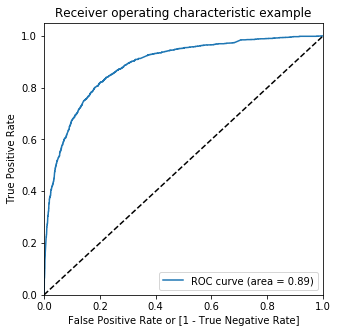

In [305]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The AUC is 0.89 which is decent and the curve is not close to the diagnol.

## Finding Optimal Cutoff Point

In [306]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.795845    5032          1    1    1    1    1    1    1   
1          0        0.127862    5316          0    1    1    0    0    0    0   
2          0        0.085299    4405          0    1    0    0    0    0    0   
3          1        0.762802    2089          1    1    1    1    1    1    1   
4          1        0.085299    1370          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    1    1    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    0    0  
4    0    0    0    0

In [307]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394075  1.000000  0.000000
0.1   0.1  0.606284  0.969932  0.369778
0.2   0.2  0.758348  0.912984  0.657778
0.3   0.3  0.793716  0.852392  0.755556
0.4   0.4  0.811490  0.783599  0.829630
0.5   0.5  0.811849  0.710706  0.877630
0.6   0.6  0.803591  0.637358  0.911704
0.7   0.7  0.786894  0.544875  0.944296
0.8   0.8  0.753321  0.419134  0.970667
0.9   0.9  0.705566  0.269704  0.989037


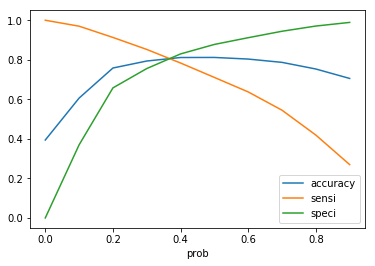

In [308]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the plot above, 0.35 is the optimum point to take it as a cutoff probability**

In [309]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.795845    5032          1    1    1    1    1    1    1   
1          0        0.127862    5316          0    1    1    0    0    0    0   
2          0        0.085299    4405          0    1    0    0    0    0    0   
3          1        0.762802    2089          1    1    1    1    1    1    1   
4          1        0.085299    1370          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  lead_score  
0    1    1    0    0                1   79.584461  
1    0    0    0    0                0   12.786226  
2    0    0    0    0                0    8.529937  
3    1    1    0    0                1   76.280207  
4    0    0    0    0                0    8.529937

### Metrics

In [310]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80682226211849195

In [311]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion2

array([[2693,  682],
       [ 394, 1801]])

In [312]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [313]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.82050113895216403

In [314]:
# Let us calculate specificity

TN / float(TN+FP)

0.79792592592592593

In [315]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.202074074074


In [316]:
from sklearn.metrics import precision_score, recall_score

In [317]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.72533225936367296

In [318]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.82050113895216403

## Precision and Recall Tradeoff

In [319]:
from sklearn.metrics import precision_recall_curve

In [320]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      1
 12      1
 13      0
 14      1
 15      0
 16      1
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      1
 30      0
 31      0
 32      1
 33      1
 34      1
 35      0
 36      0
 37      1
 38      0
 39      0
 40      0
 41      1
 42      1
 43      0
 44      1
 45      0
 46      0
 47      0
 48      0
 49      0
 50      1
 51      0
 52      0
 53      0
 54      1
 55      1
 56      0
 57      0
 58      0
 59      1
 60      1
 61      1
 62      1
 63      1
 64      0
 65      0
 66      0
 67      0
 68      0
 69      0
 70      0
 71      1
 72      1
 73      0
 74      1
 75      0
 76      1
 77      1
 78      0
 79      1
 80      0
 81      1
 82      1
 83      0
 84      0
 85      1
 86      0
 87      1
 88      1
 89      0
 90      1

In [321]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

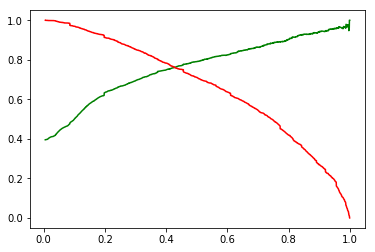

In [322]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**From the plot above, 0.42 is the optimum point to take it as a cutoff probability**

In [323]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.795845    5032          1    1    1    1    1    1    1   
1          0        0.127862    5316          0    1    1    0    0    0    0   
2          0        0.085299    4405          0    1    0    0    0    0    0   
3          1        0.762802    2089          1    1    1    1    1    1    1   
4          1        0.085299    1370          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  lead_score  
0    1    1    0    0                1   79.584461  
1    0    0    0    0                0   12.786226  
2    0    0    0    0                0    8.529937  
3    1    1    0    0                1   76.280207  
4    0    0    0    0                0    8.529937

### Metrics

In [324]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.81220825852782763

In [325]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

confusion3

array([[2840,  535],
       [ 511, 1684]])

In [326]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [327]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.76719817767653764

In [328]:
# Let us calculate specificity

TN / float(TN+FP)

0.8414814814814815

In [329]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.158518518519


In [330]:
from sklearn.metrics import precision_score, recall_score

In [331]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.75890040558810279

In [332]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.76719817767653764

## Making predictions on the test set

In [333]:
X_test[['Total_Visits','Time_On_Website','Page_Views']] = scaler.transform(X_test[['Total_Visits','Time_On_Website','Page_Views']])

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [334]:
X_test = X_test[col]
X_test.head()

No_Email  Time_On_Website  Lead_Origin_lead add form  \
3833         0        -0.490814                          0   
2508         0        -0.828478                          0   
5291         0         1.304614                          0   
3892         0        -1.031803                          0   
3254         0        -0.596107                          0   

      Last_Notable_Activity_modified  Lead_Profile_potential lead  \
3833                               0                            0   
2508                               0                            1   
5291                               0                            0   
3892                               1                            0   
3254                               1                            0   

      Lead_Profile_student of someschool  Occupation_working professional  \
3833                                   0                                0   
2508                                   0                                0   
5291                                   0                                0   
3892                                   1                                0   
3254                                   0                                0   

      Last_Activity_sms sent  Lead_Source_direct traffic  Lead_Source_google  \
3833                       1                           1                   0   
2508                       1                           0                   0   
5291                       1                           0                   1   
3892                       0                           0                   0   
3254                       0                           0                   1   

      Lead_Source_organic search  
3833                           0  
2508                           1  
5291                           0  
3892                           0  
3254                           0

In [335]:
X_test_sm = sm.add_constant(X_test)

In [336]:
y_test_pred = res.predict(X_test_sm)

In [337]:
y_test_pred[:10]

3833    0.333299
2508    0.722065
5291    0.791781
3892    0.013962
3254    0.057891
472     0.911200
3156    0.083819
5141    0.772272
3669    0.126568
62      0.778165
dtype: float64

In [338]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [339]:
# Let's see the head

y_pred_1.head()

0
3833  0.333299
2508  0.722065
5291  0.791781
3892  0.013962
3254  0.057891

In [340]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [341]:
# Putting CustID to index

y_test_df['CustID'] = y_test_df.index

In [342]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [343]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [344]:
y_pred_final.head()

Converted  CustID         0
0          0    3833  0.333299
1          1    2508  0.722065
2          1    5291  0.791781
3          0    3892  0.013962
4          0    3254  0.057891

In [345]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [346]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  app.launch_new_instance()


In [347]:
# Let's see the head of y_pred_final

y_pred_final.head()

CustID  Converted  Converted_Prob
0    3833          0        0.333299
1    2508          1        0.722065
2    5291          1        0.791781
3    3892          0        0.013962
4    3254          0        0.057891

In [348]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['lead_score'] = y_pred_final.Converted_Prob * 100

In [349]:
y_pred_final.head()

CustID  Converted  Converted_Prob  final_predicted  lead_score
0    3833          0        0.333299                0   33.329869
1    2508          1        0.722065                1   72.206536
2    5291          1        0.791781                1   79.178122
3    3892          0        0.013962                0    1.396213
4    3254          0        0.057891                0    5.789072

### Metrics

In [350]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.81825795644891119

In [351]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )

confusion4

array([[1198,  203],
       [ 231,  756]])

In [352]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [353]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.76595744680851063

In [354]:
# Let us calculate specificity

TN / float(TN+FP)

0.85510349750178449

In [355]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.144896502498


In [356]:
# Precision

confusion4[1,1]/(confusion4[0,1]+confusion4[1,1])

0.78832116788321172

In [357]:
# Recall

confusion4[1,1]/(confusion4[1,0]+confusion4[1,1])

0.76595744680851063

Detail comments and observations on the metrics is provided at the bottom of this notebook and is used for model comparison.

# Model Comparison

<img src="Metrics1.png",width=1000,height=1000>

**Model 1**

AUC is decent, variables are not many and are easily interpretable. Accuracy, Sensitivity, Precision values are comparable with Model 3.

Precision ~ 80% which is the target set by CEO.

**Model 2**

AUC is less compared to Model 1 and 3, variables are not many and are easily interpretable. But, the accuracy and sensitivity values are significantly less than Model 1 and 3.

Precision ~ 80% which is the target set by CEO.

**Model 3**

AUC is good and comparable to Model 1, variables count is high compared to Model 1 and 2. Accuracy, Sensitivity, Precision values are comparable with Model 1.

Precision ~ 80% which is the target set by CEO.

# Verdict

Model 1 is the winner since it is simple with lesser number of variables, decent AUC and evaluation metrics with precision ~ 80%.